In [3]:
from models import resolve_single
from models.edsr import edsr
from models.common import evaluate

from utils import load_image, plot_sample

from data import drone_data

valid_loader = drone_data(subset='valid')
valid_ds = valid_loader.dataset(batch_size=1, repeat_count=1)

sat_img_path = f'../satellite_rgb/Subset_projected_S2B_MSIL2A_20190306T052709_N0211_R105_T43RGP_20190306T101639.png'


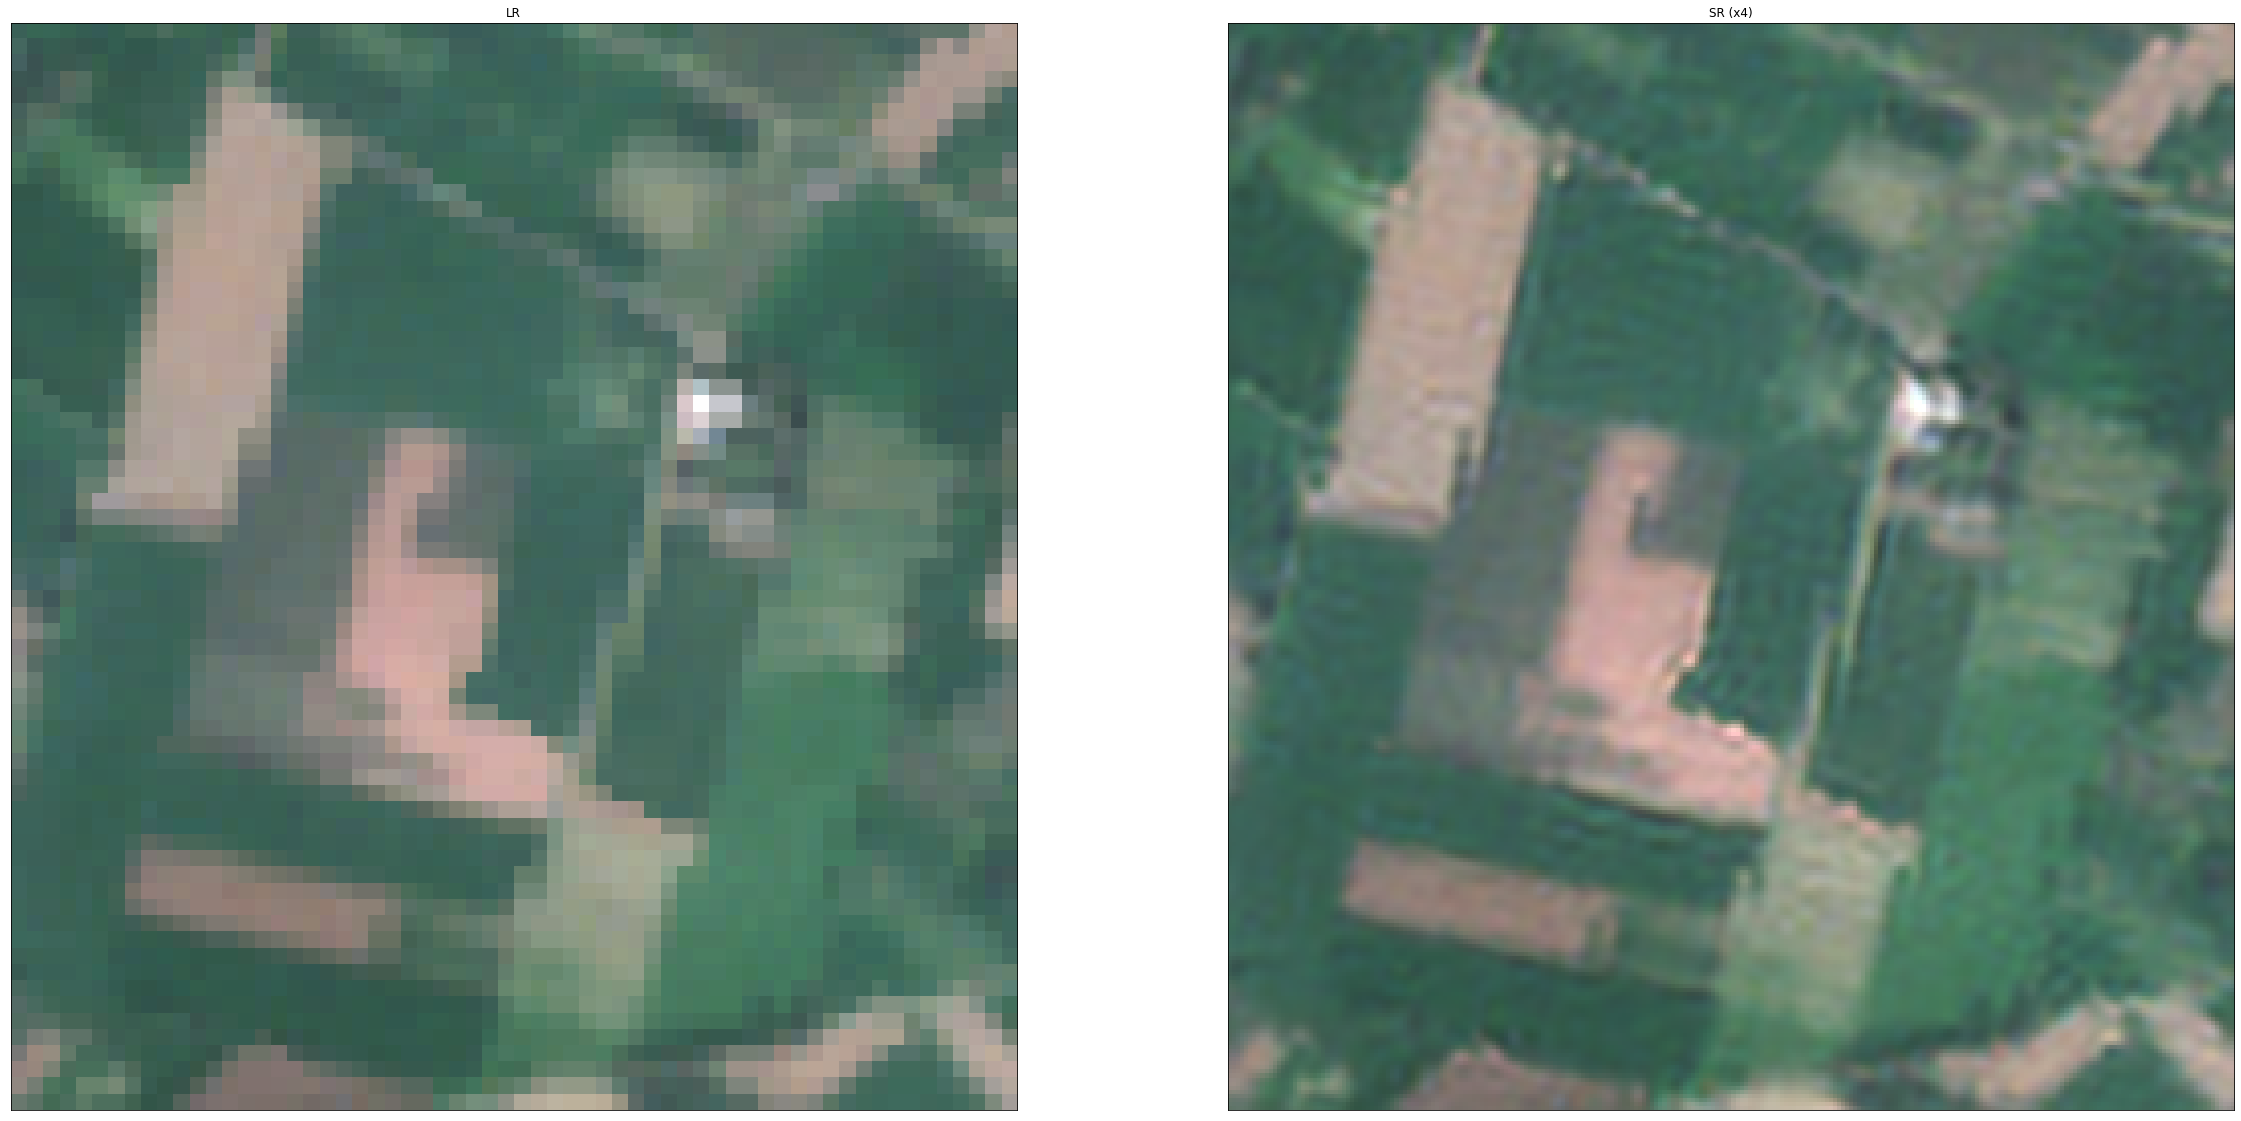

In [5]:
from models.wdsr import wdsr_b

wdsrb_model = wdsr_b(scale=4, num_res_blocks=32)
wdsrb_model.load_weights('../weights_after_gpu_training/wdsr-b-32-x4/weights.h5')

lr = load_image(sat_img_path)
sr = resolve_single(wdsrb_model, lr)

plot_sample(lr, sr)


In [17]:
def plot_drone(model, num):
    drone_loc = '/home/kareka/Academics/btpself/data/'
    drone_img_path = drone_loc+'drone_rgb_lr/'+str(num)+'_04.png'
    drone_img_path_hr = drone_loc+'drone_rgb_hr/'+str(num)+'.png'

    lr = load_image(drone_img_path)
    sr = resolve_single(wdsrb_model, lr)
    hr = load_image(drone_img_path_hr)

    plot_sample(lr, sr)
    plot_sample(hr, hr)

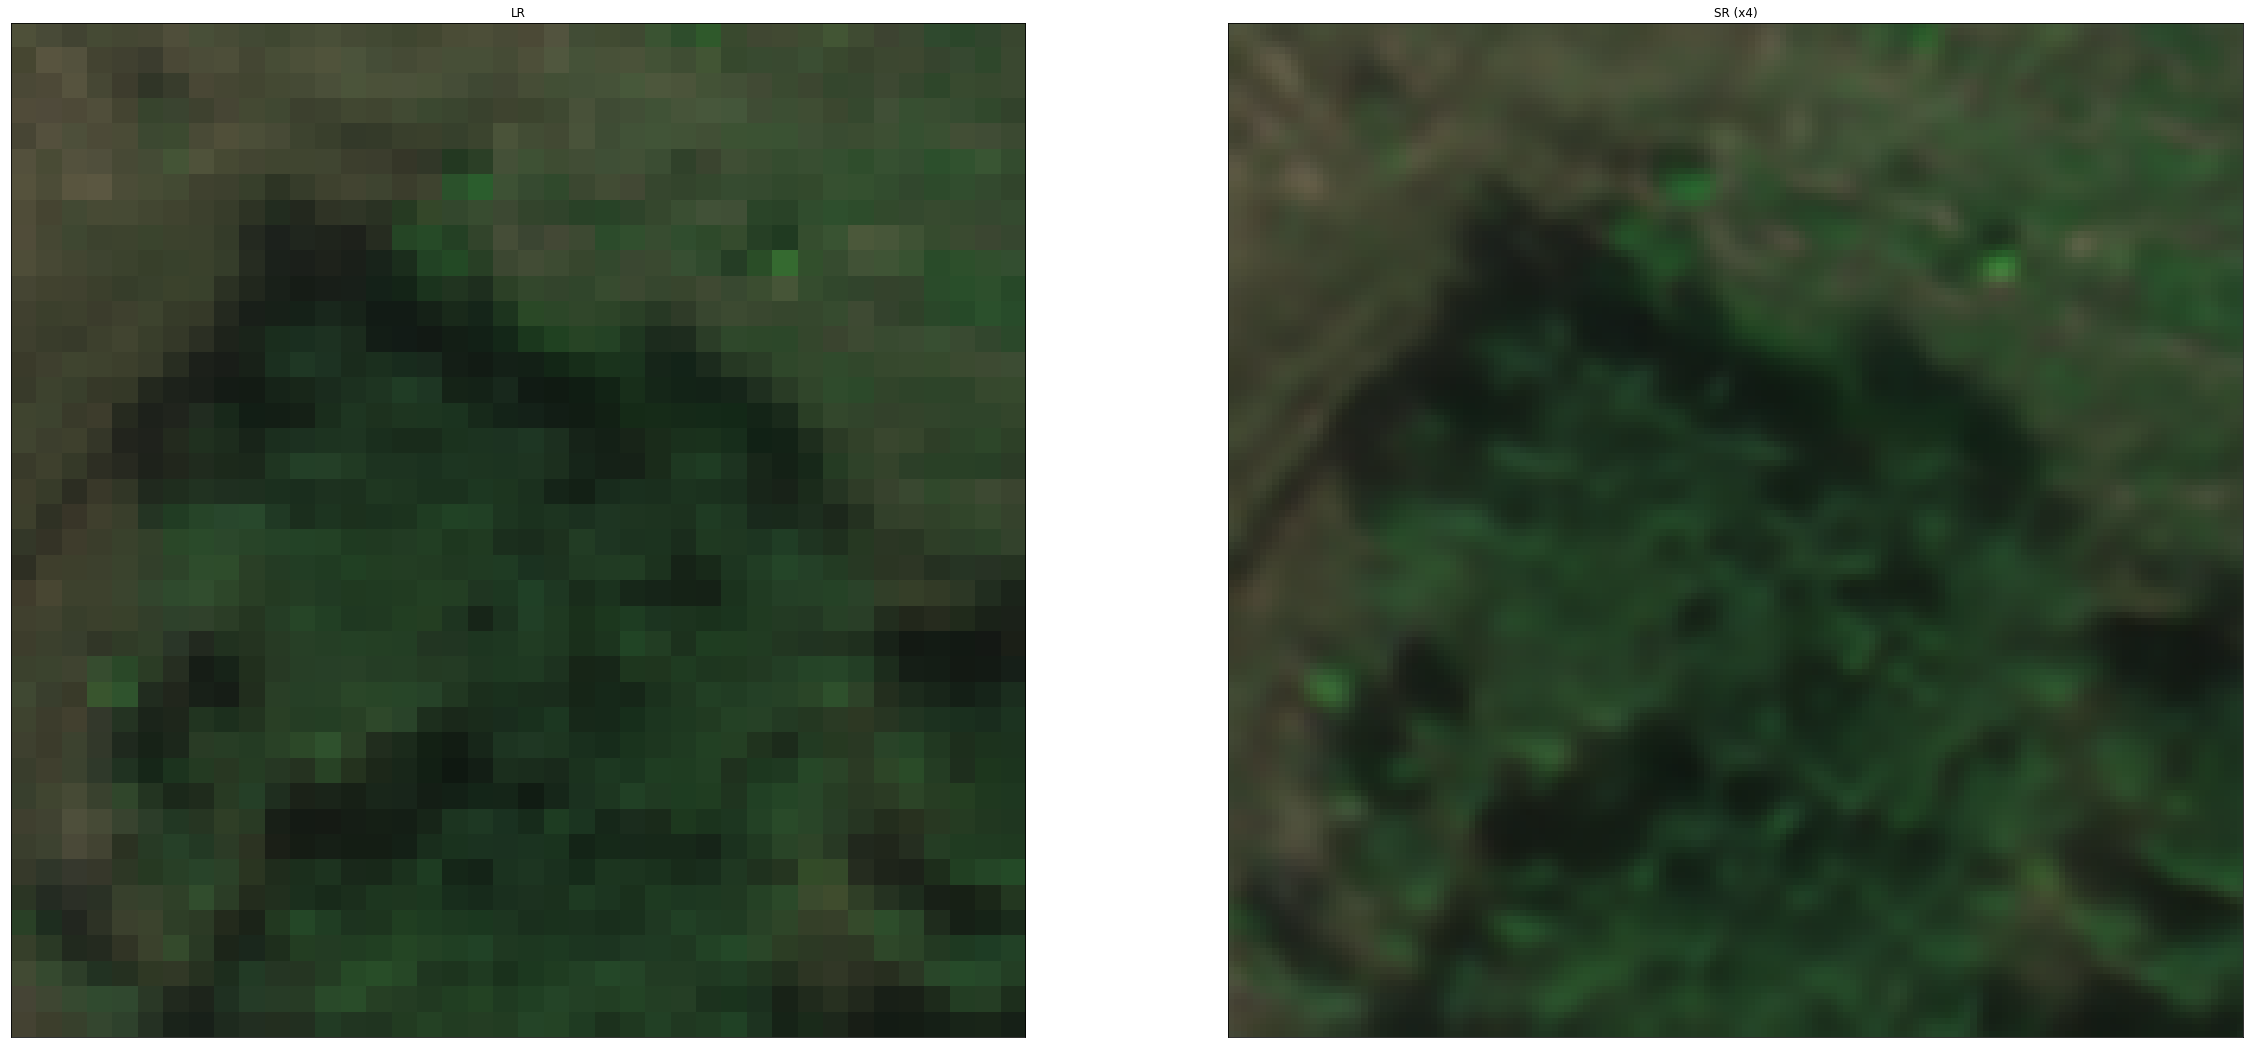

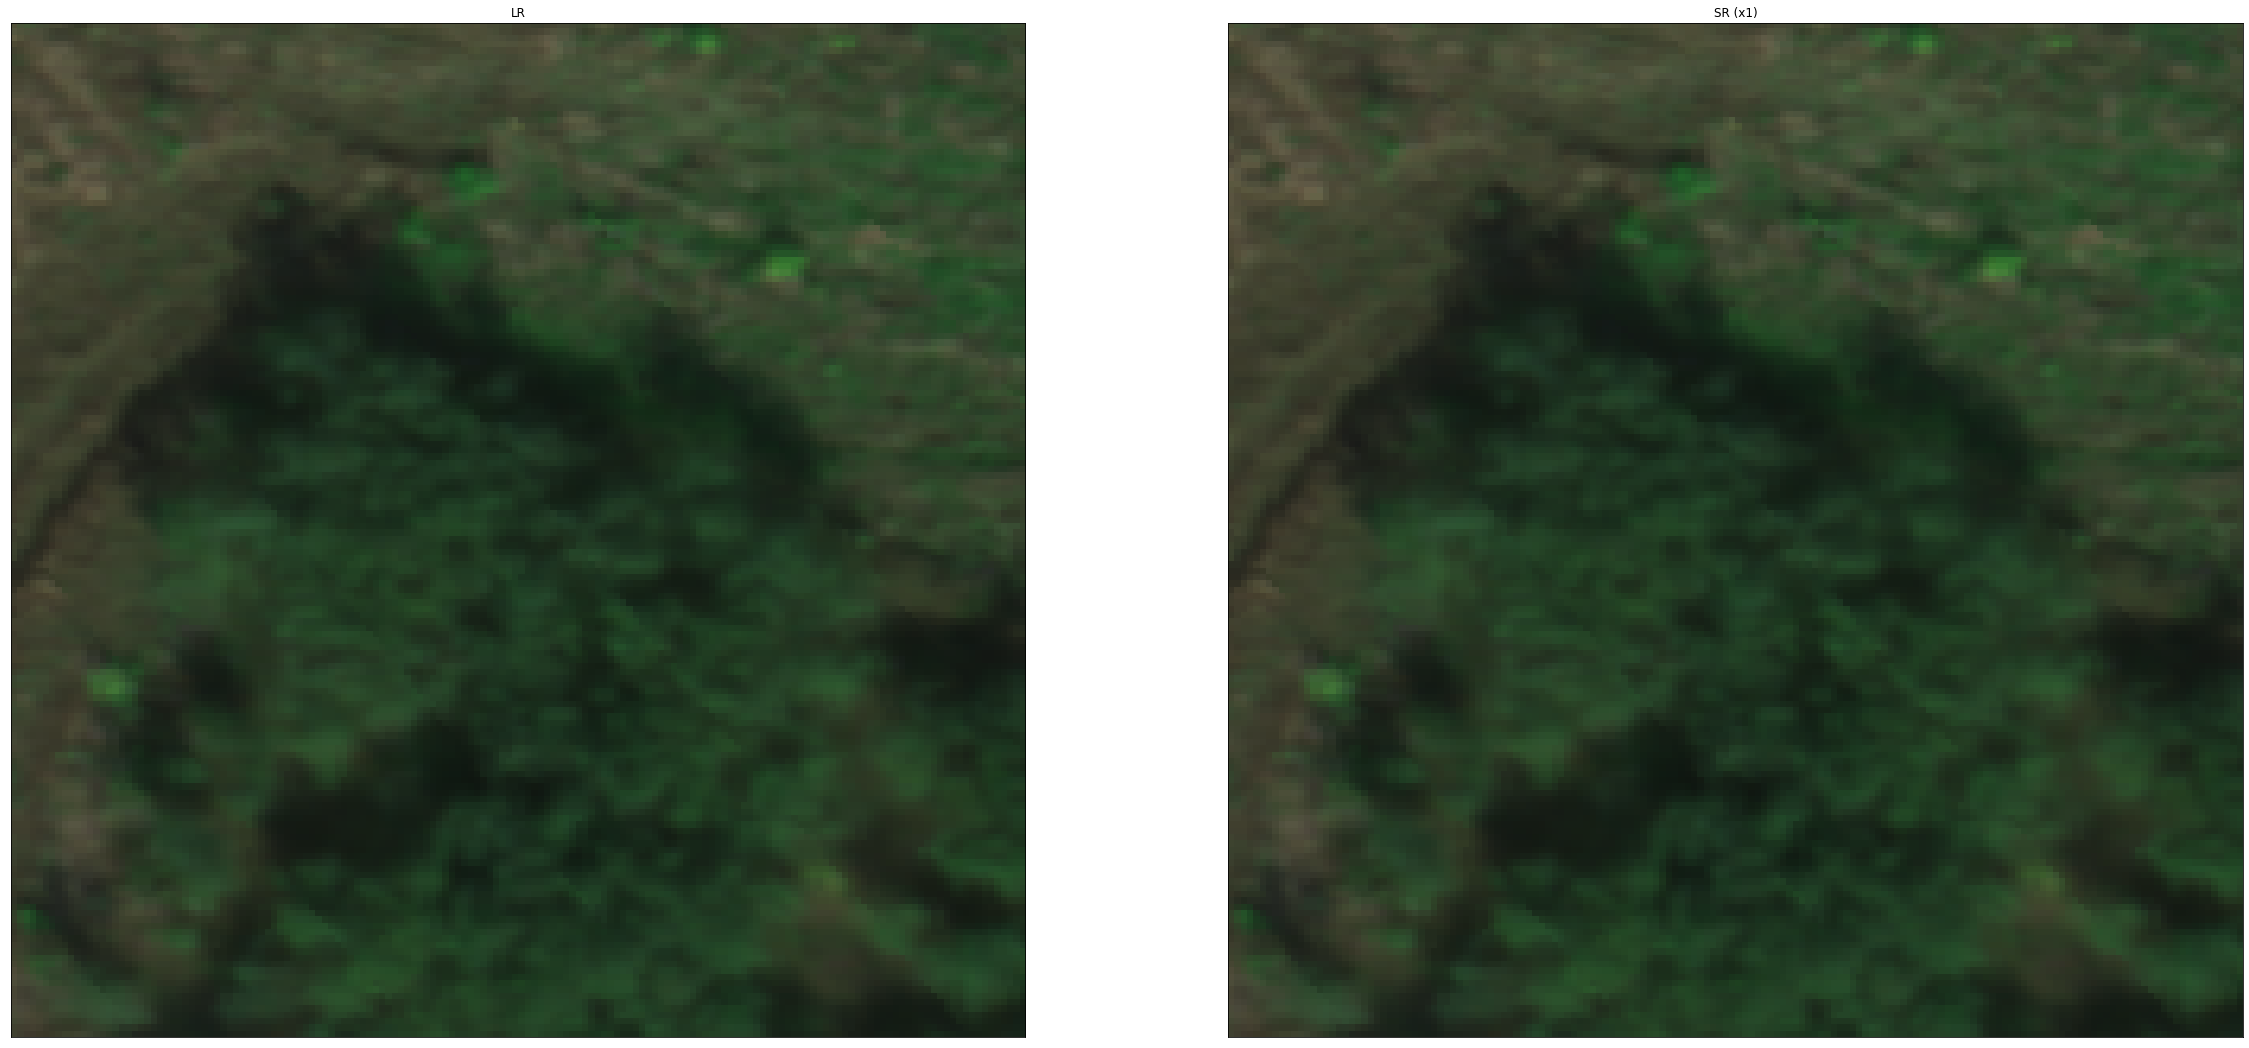

In [18]:
plot_drone(wdsrb_model, 56)

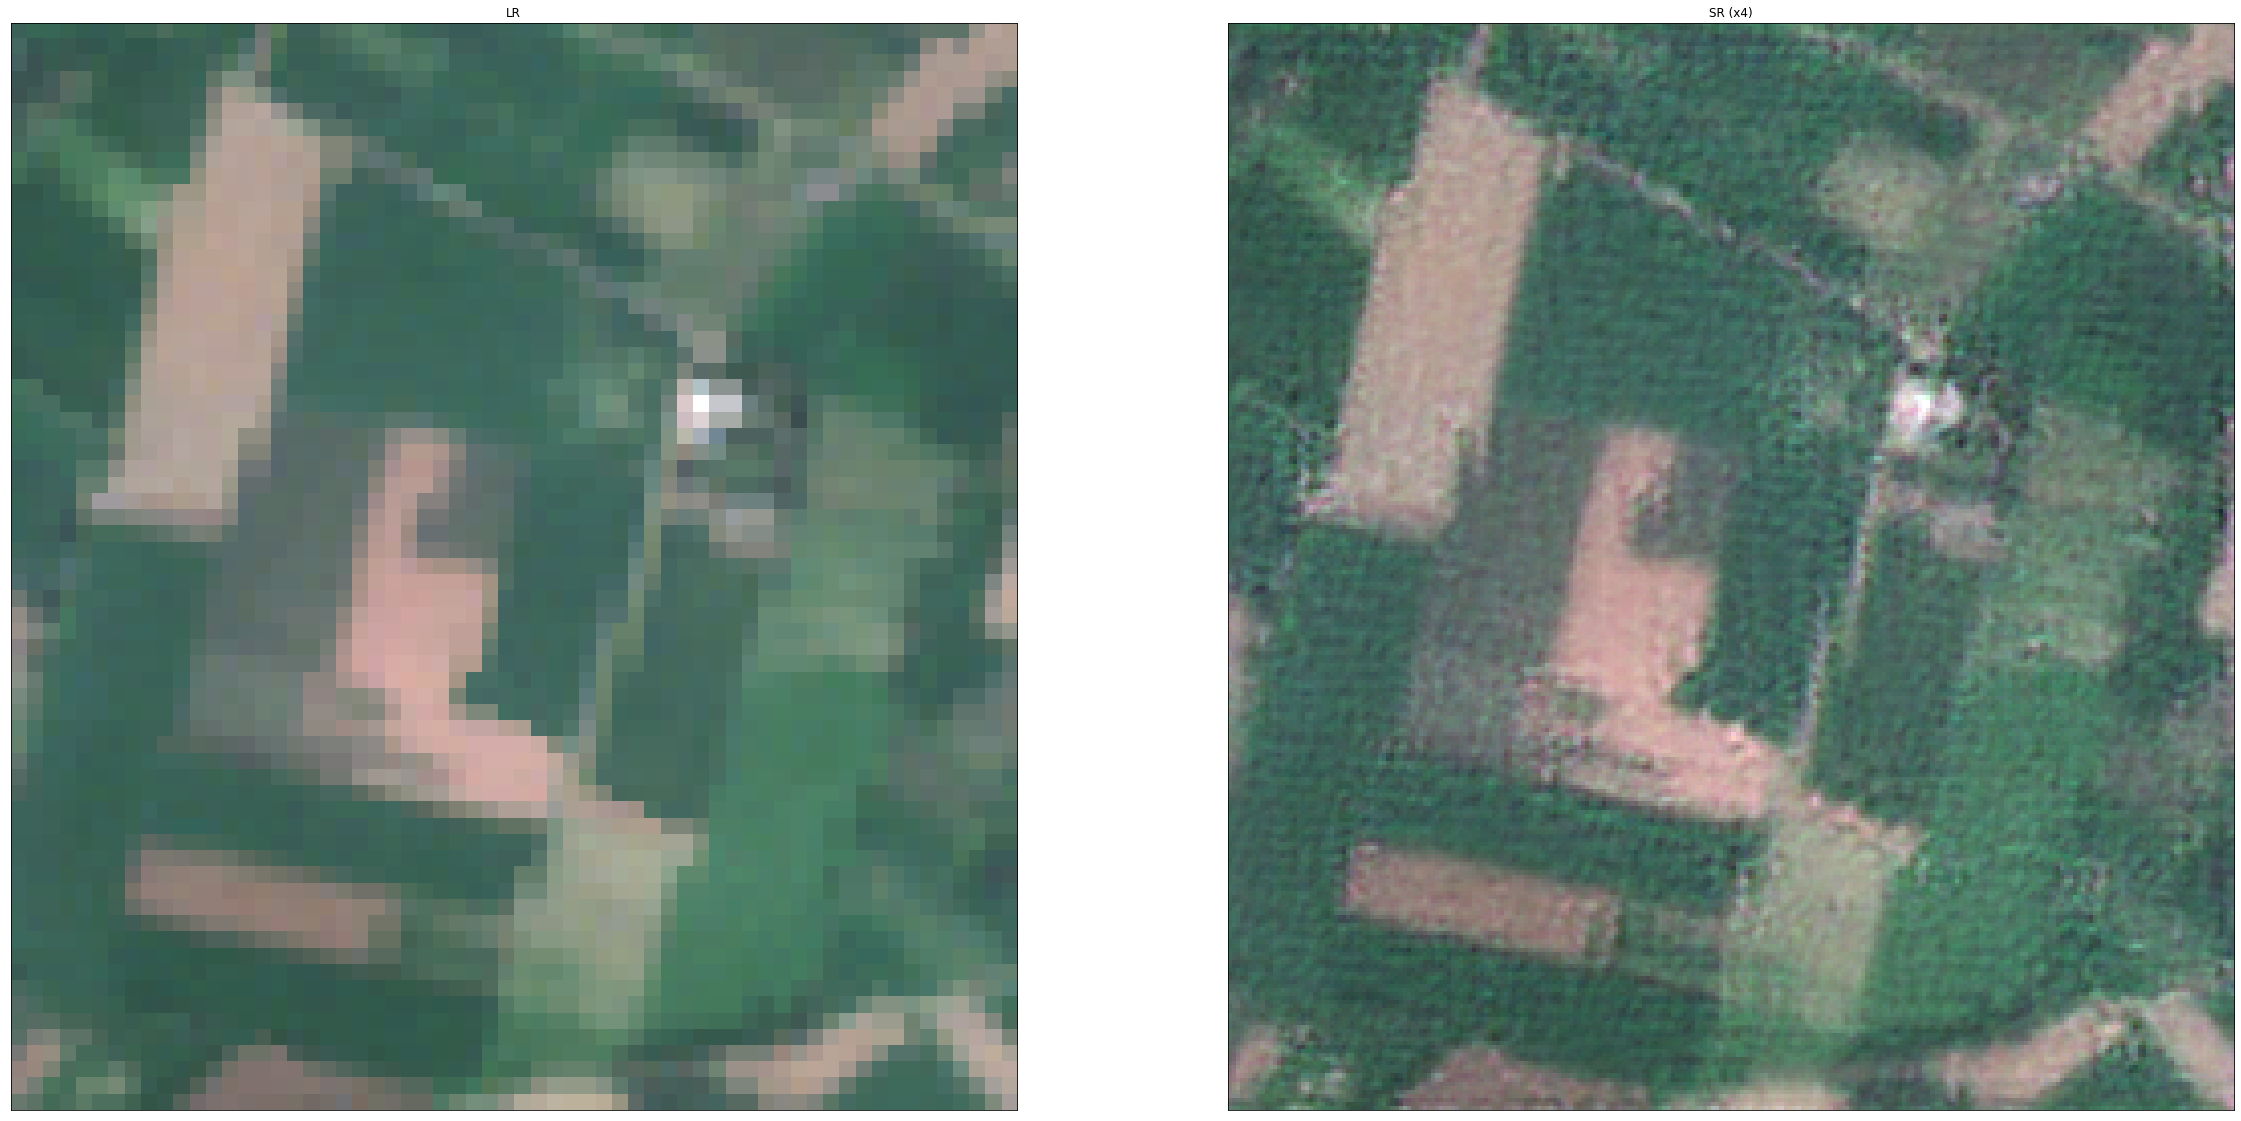

In [6]:
wdsrb_ft_model = wdsr_b(scale=4, num_res_blocks=32)
wdsrb_ft_model.load_weights('../weights_after_gpu_training/wdsr-b-32-x4/finetuned_weights.h5')

lr = load_image(sat_img_path)
sr = resolve_single(wdsrb_ft_model, lr)

plot_sample(lr, sr)

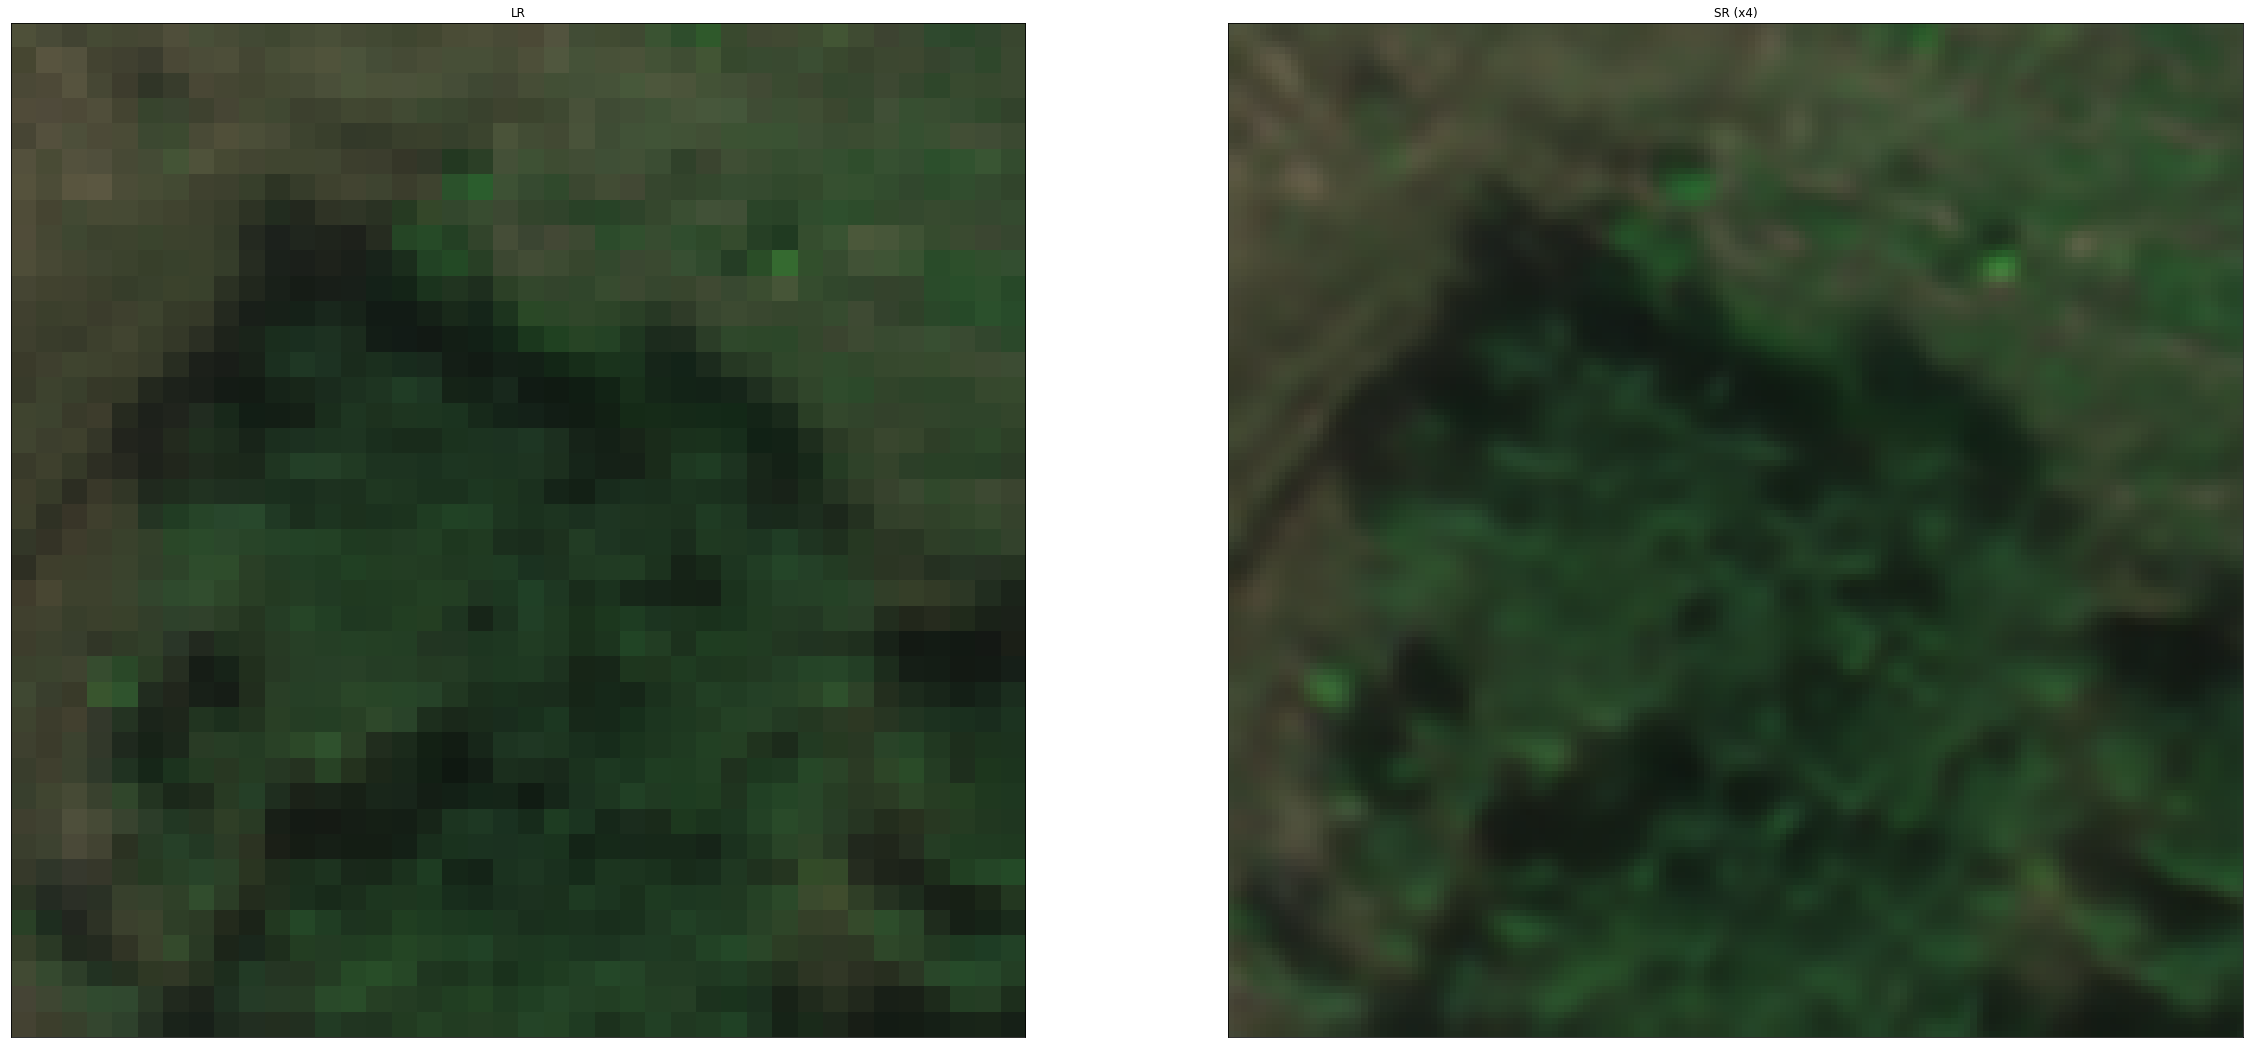

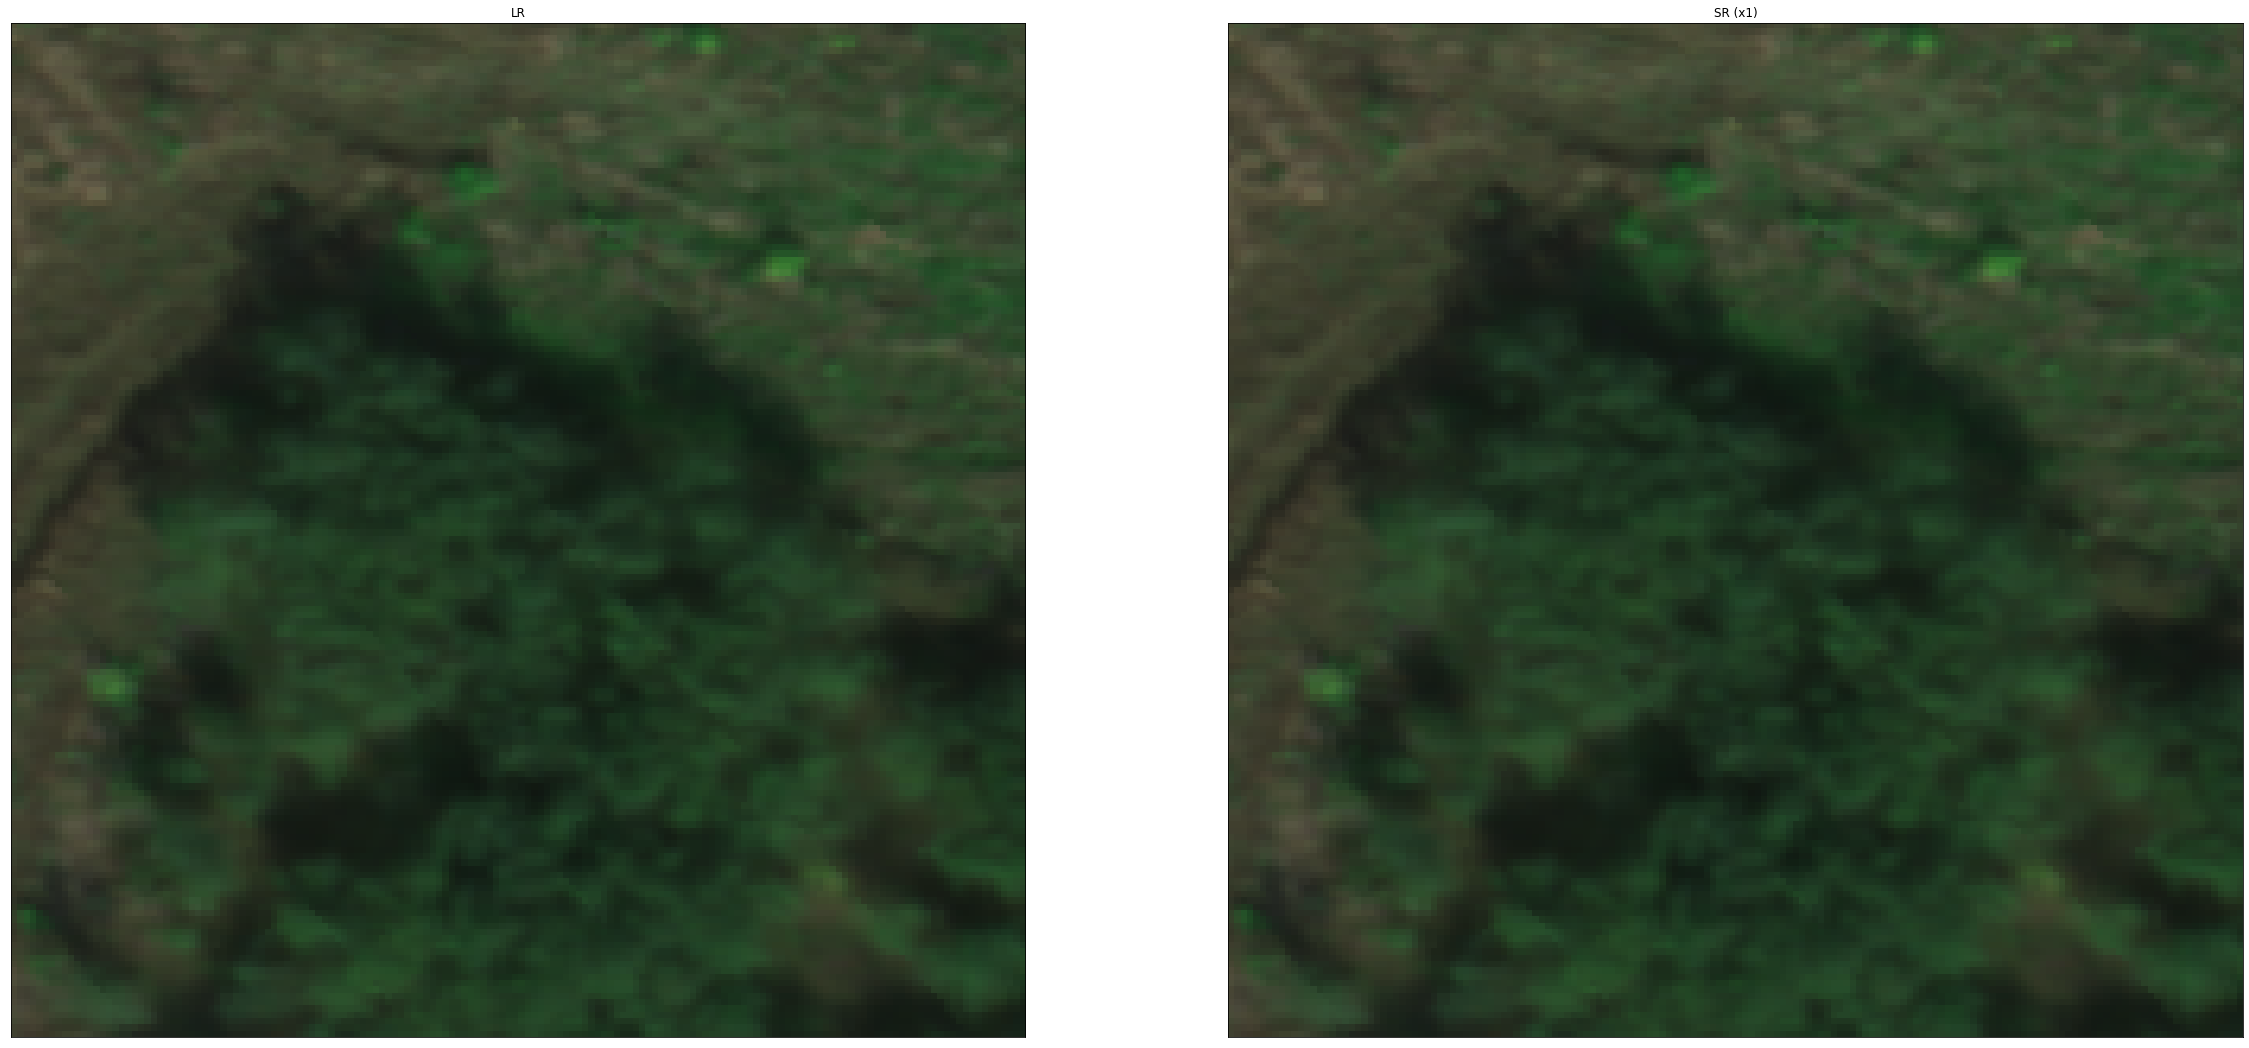

In [19]:
plot_drone(wdsrb_ft_model, 56)

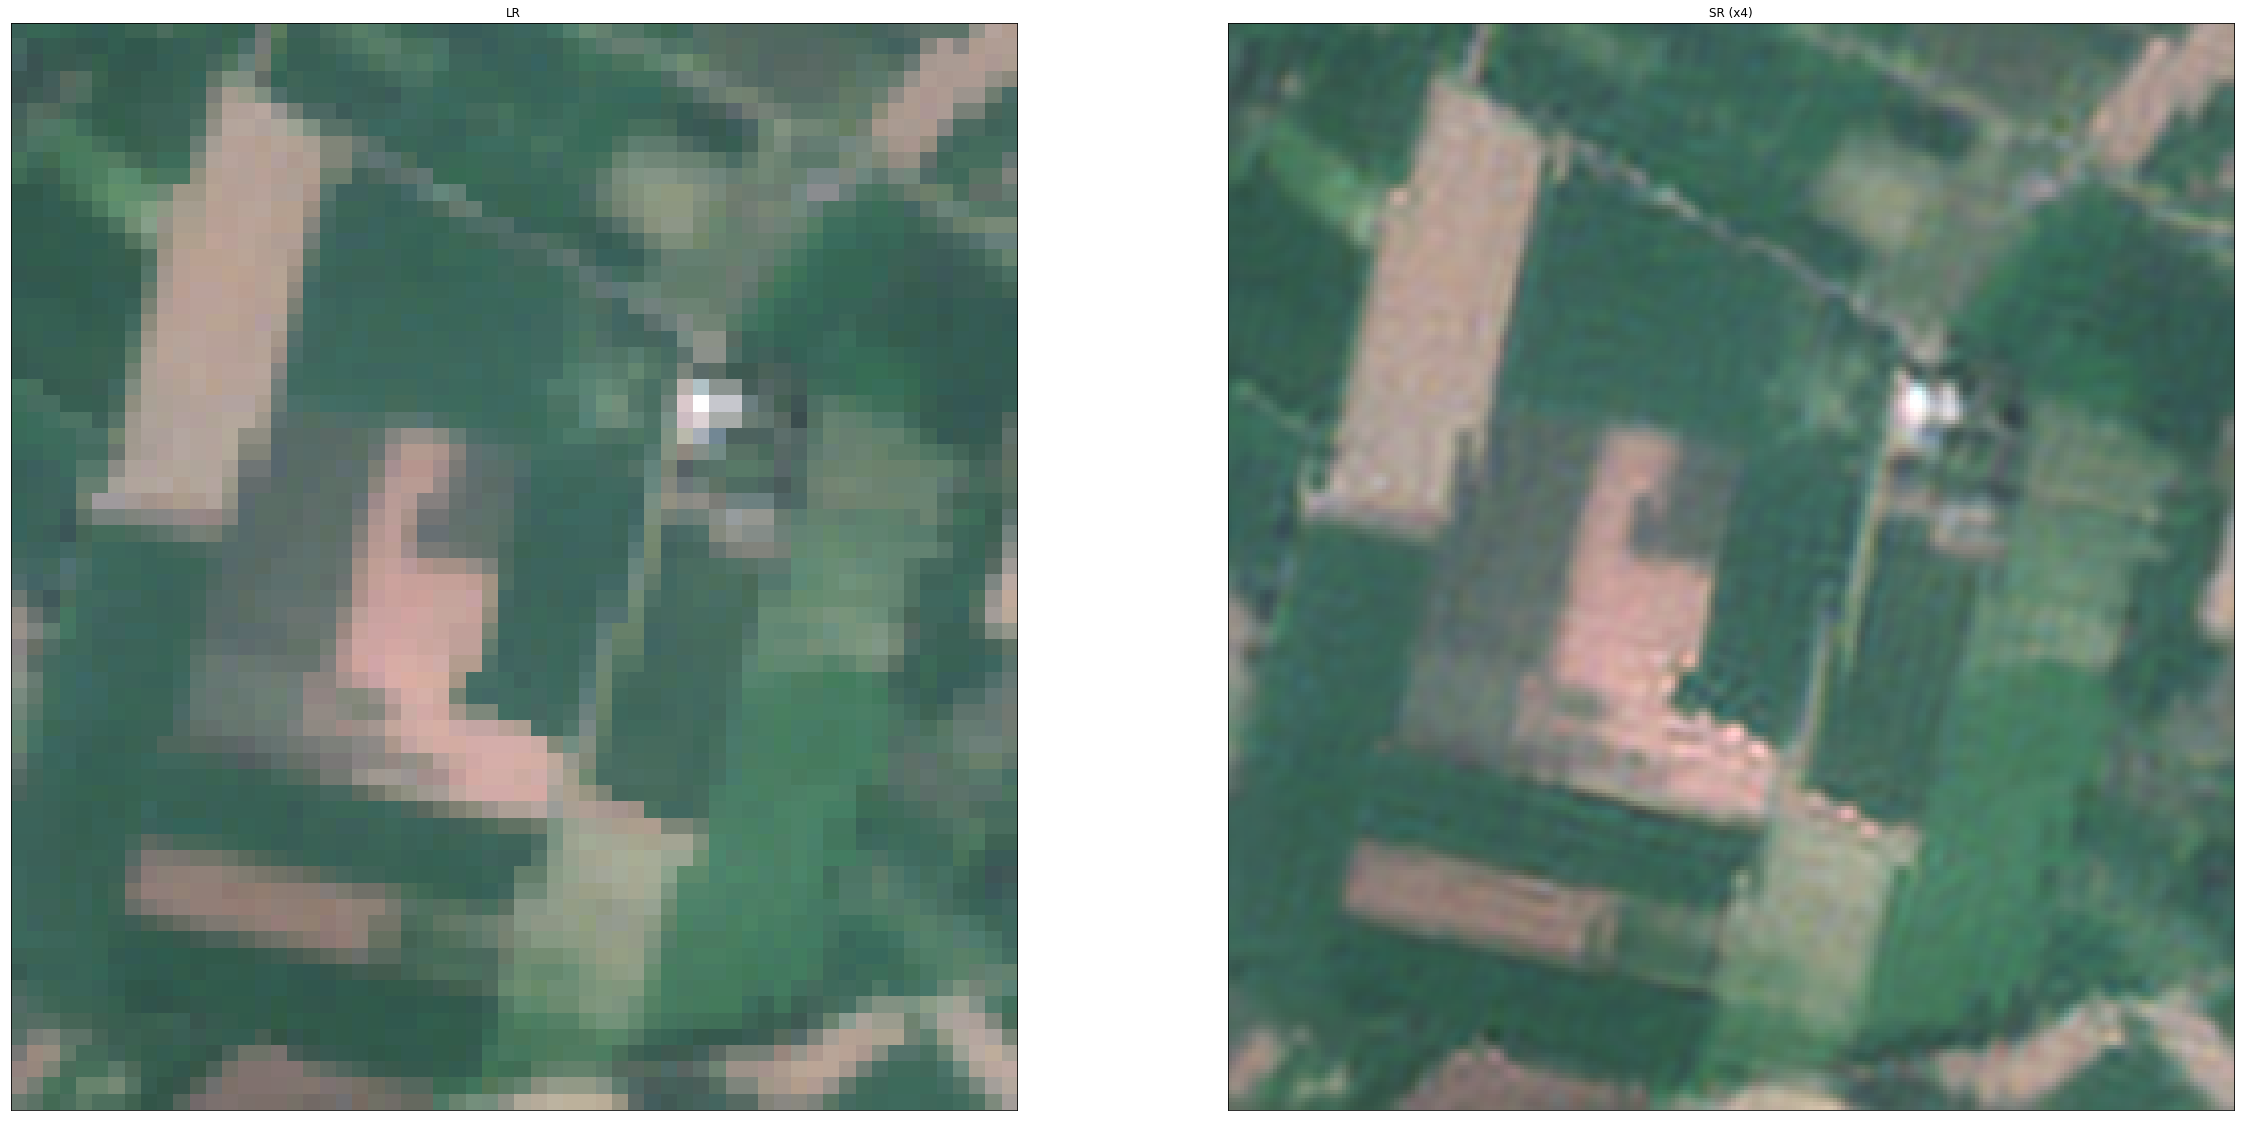

In [9]:
edsr_model = edsr(scale=4, num_res_blocks=32)
edsr_model.load_weights('../weights_after_gpu_training/edsr-32-x4/finetuned_weights.h5')

lr = load_image(sat_img_path)
sr = resolve_single(edsr_model, lr)
plot_sample(lr, sr)

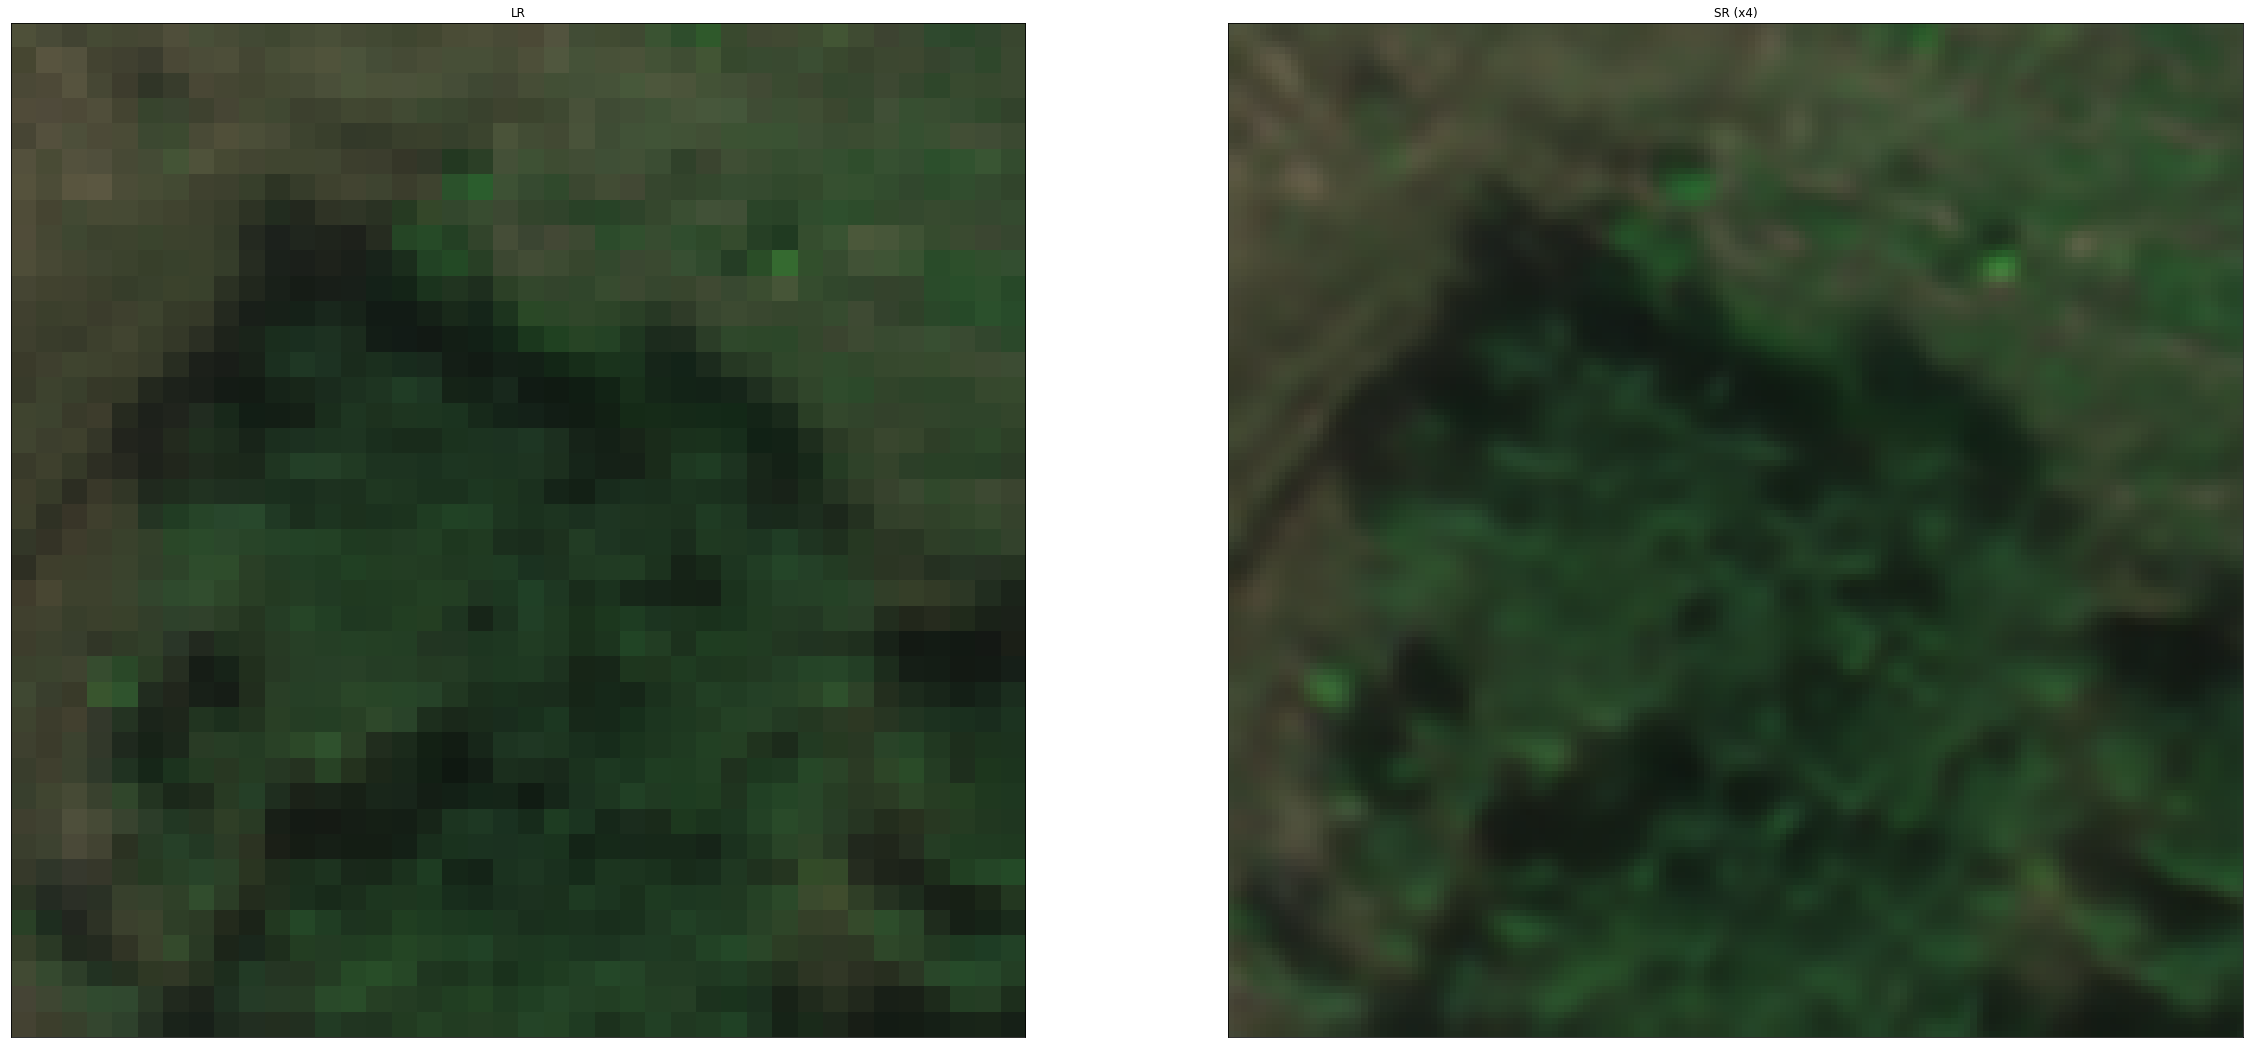

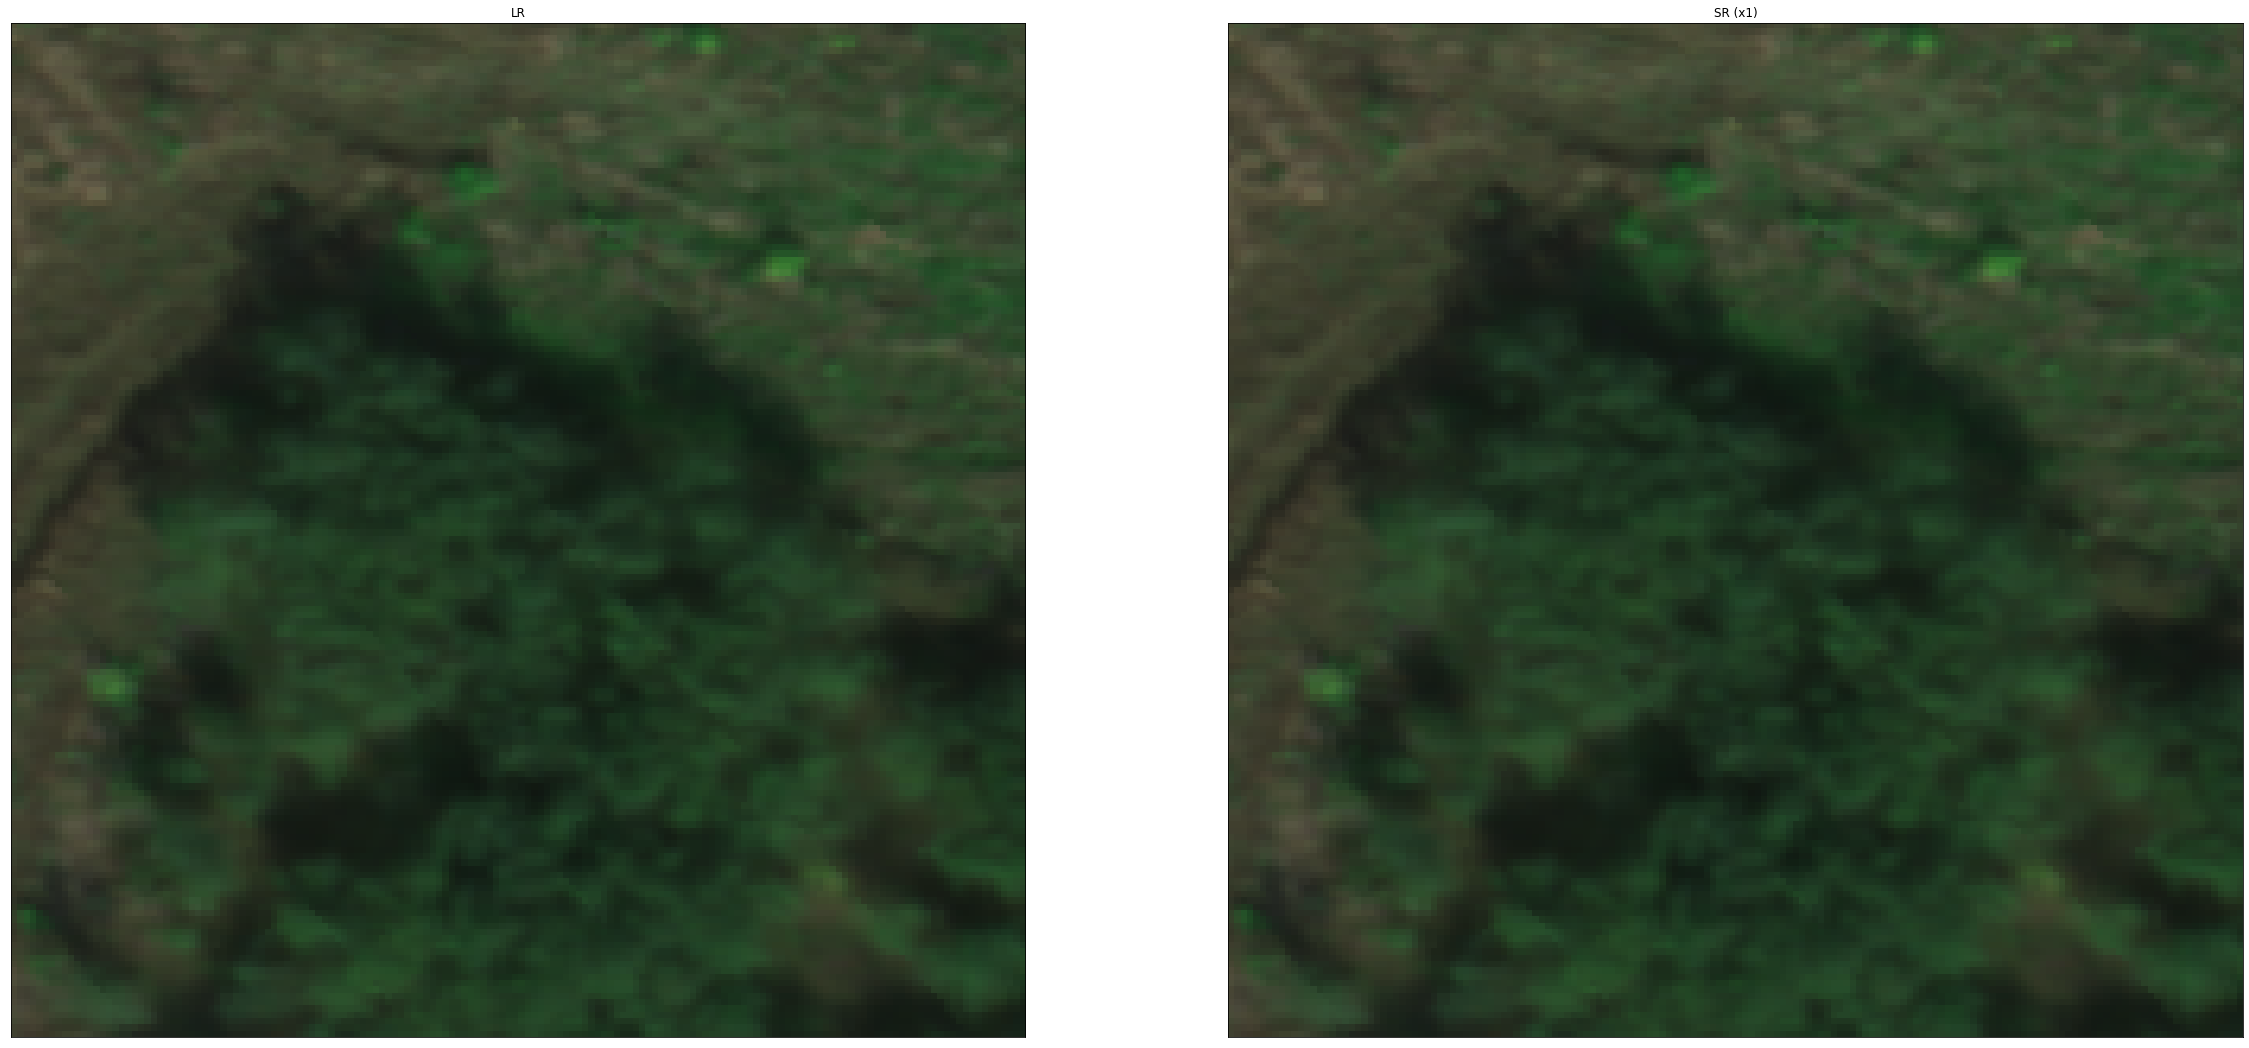

In [20]:
plot_drone(edsr_model, 56)

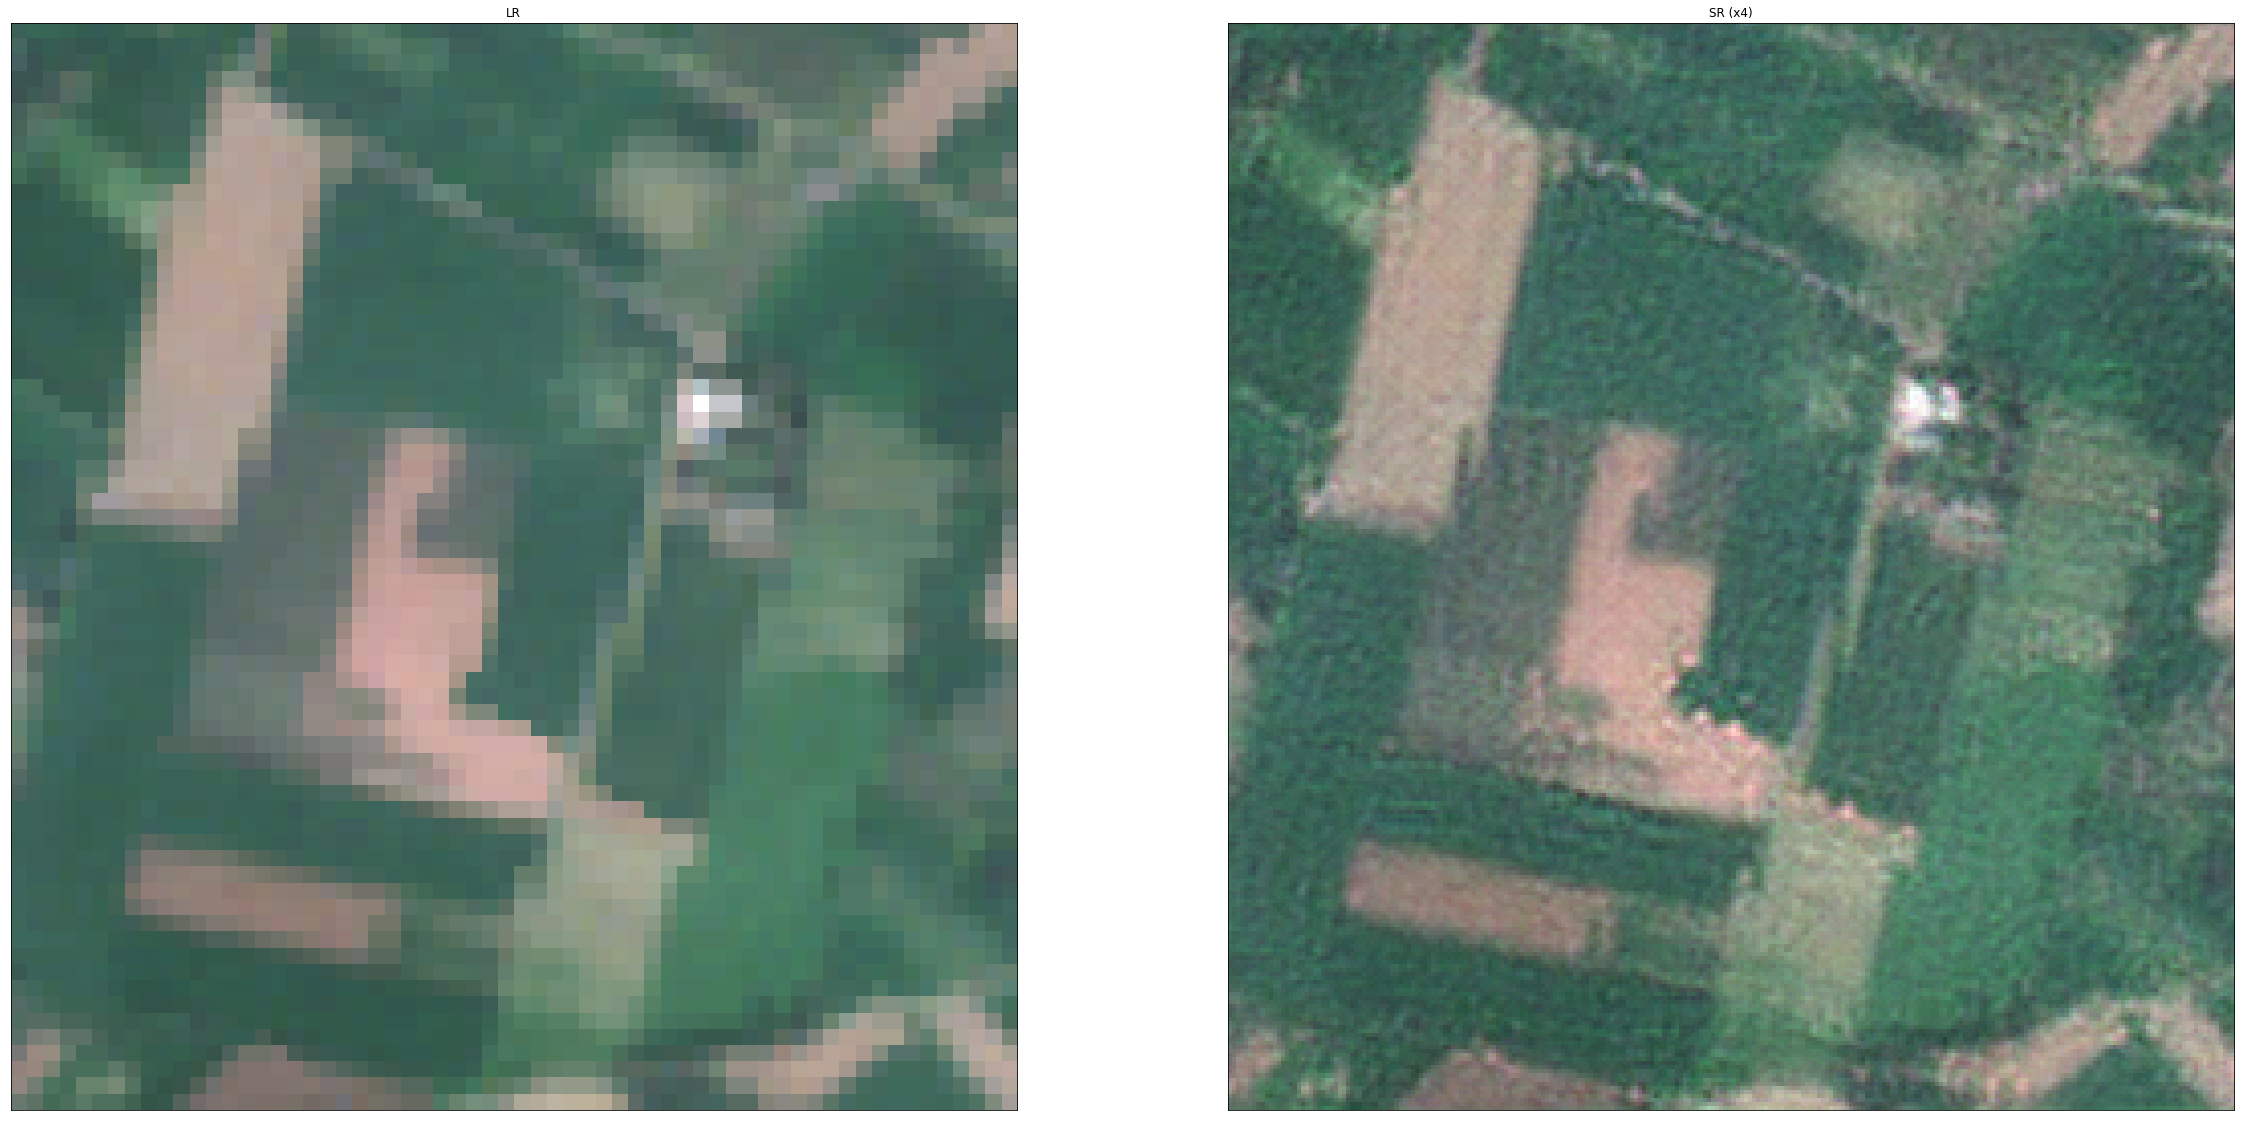

In [10]:
edsr_ft_model = edsr(scale=4, num_res_blocks=32)
edsr_ft_model.load_weights('../weights_after_gpu_training/edsr-32-x4/finetuned_weights.h5')

lr = load_image(sat_img_path)
sr = resolve_single(edsr_ft_model, lr)
plot_sample(lr, sr)

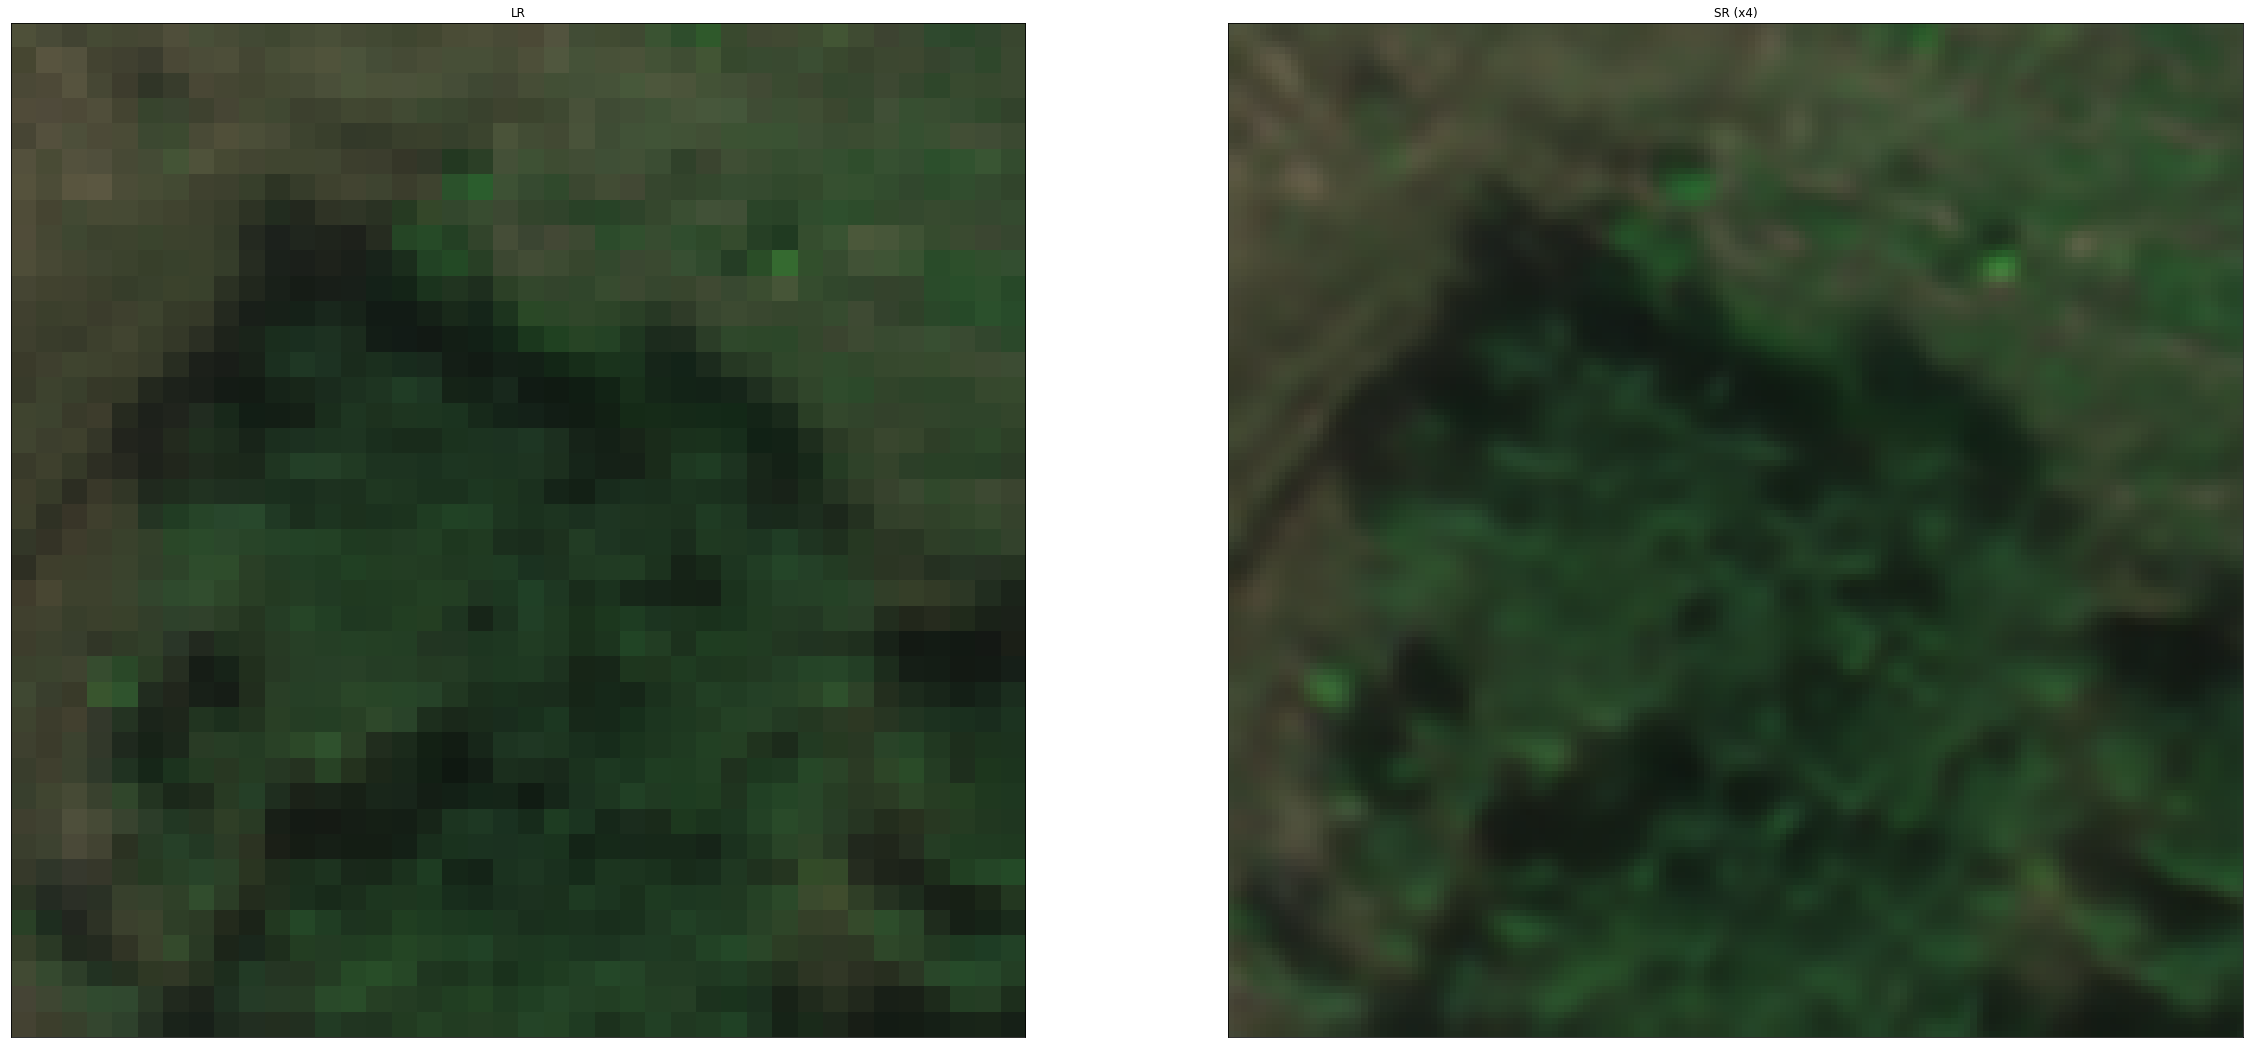

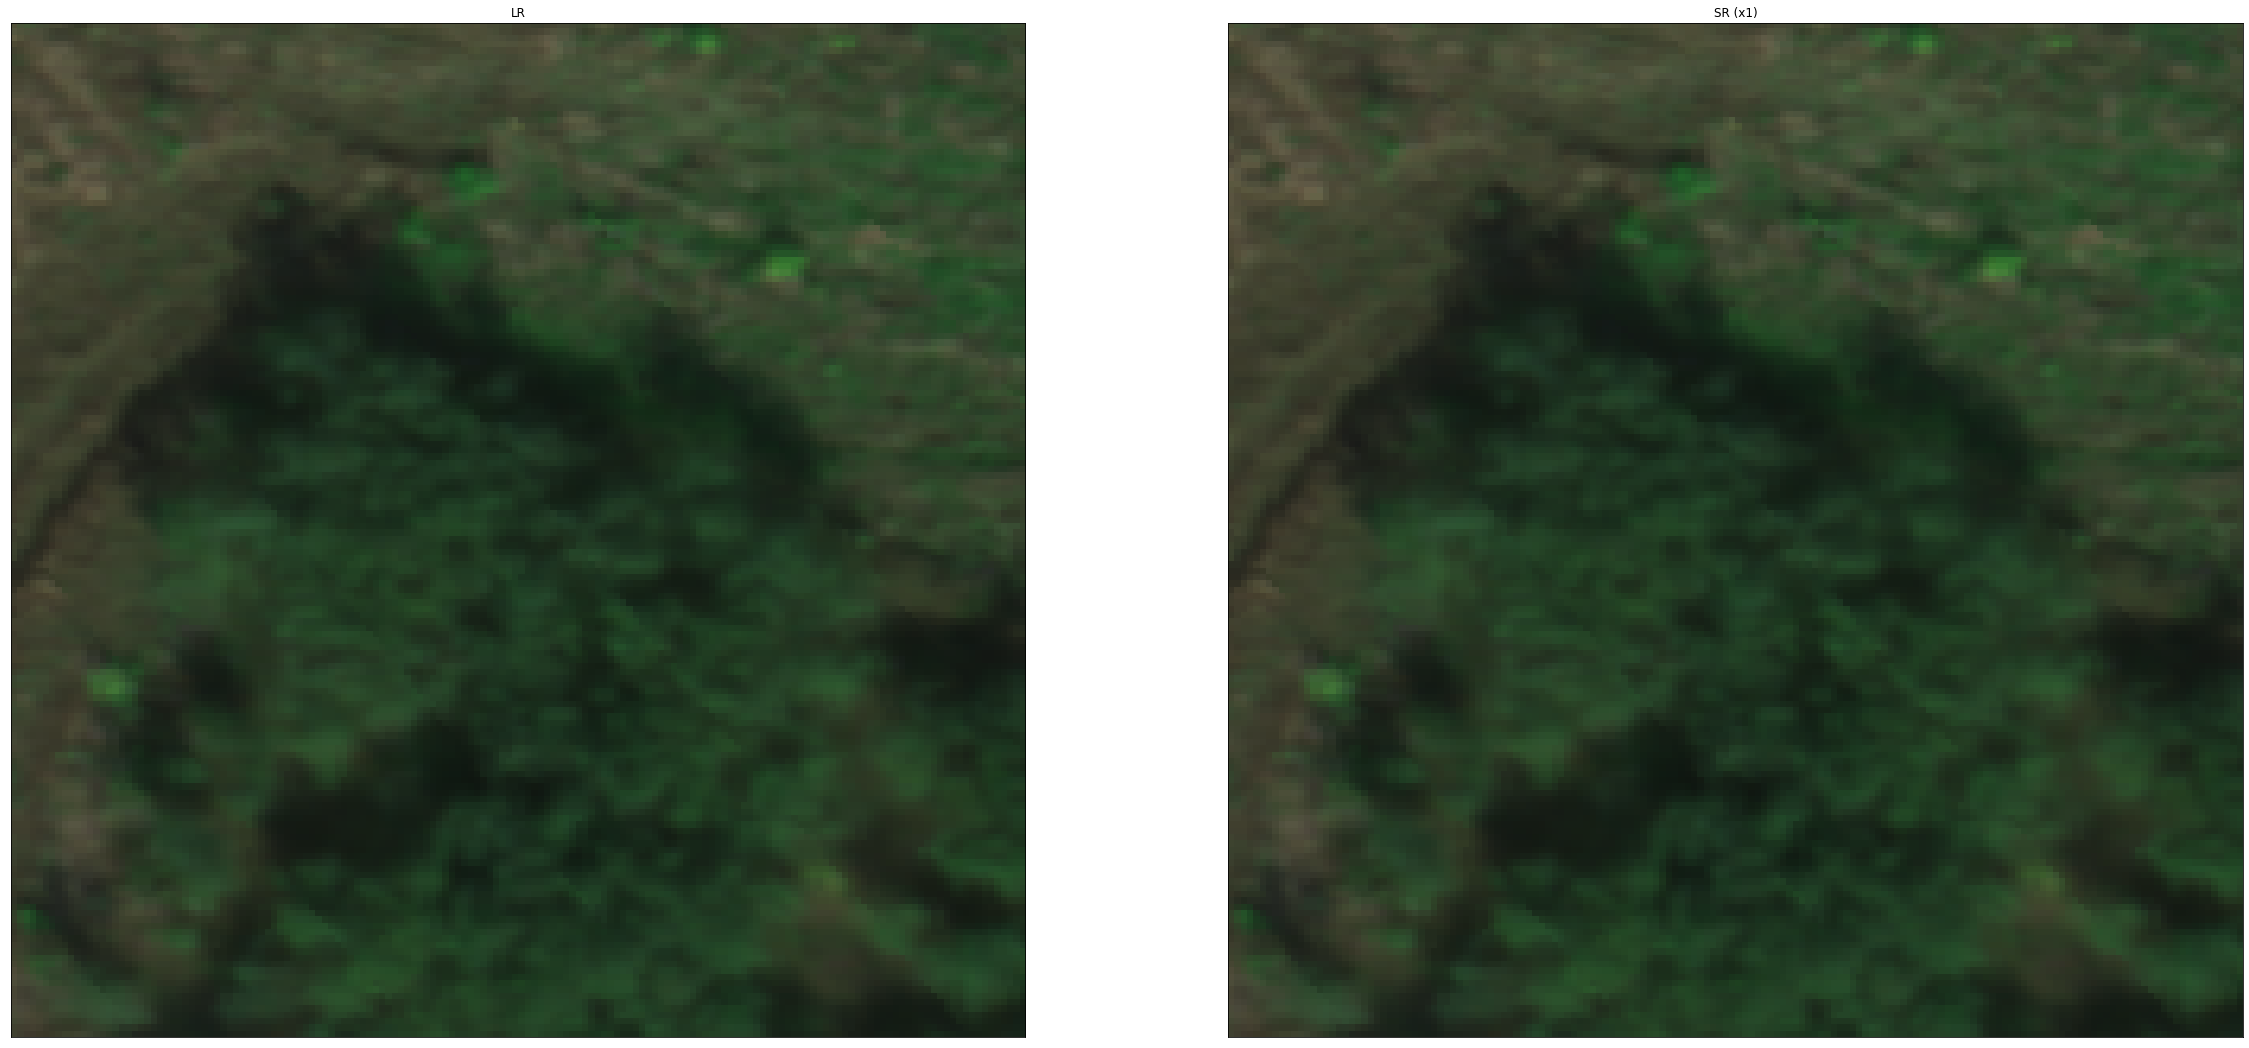

In [21]:
plot_drone(edsr_ft_model, 56)

In [15]:
psnr = evaluate(wdsrb_ft_model, valid_ds)
print(f'PSNR = {psnr.numpy():3f}')

PSNR = 32.196091


In [22]:
psnr = evaluate(wdsrb_model, valid_ds)
print(f'PSNR = {psnr.numpy():3f}')

PSNR = 32.245399


In [23]:
psnr = evaluate(edsr_model, valid_ds)
print(f'PSNR = {psnr.numpy():3f}')

PSNR = 32.196091


In [24]:
psnr = evaluate(edsr_ft_model, valid_ds)
print(f'PSNR = {psnr.numpy():3f}')

PSNR = 28.908466


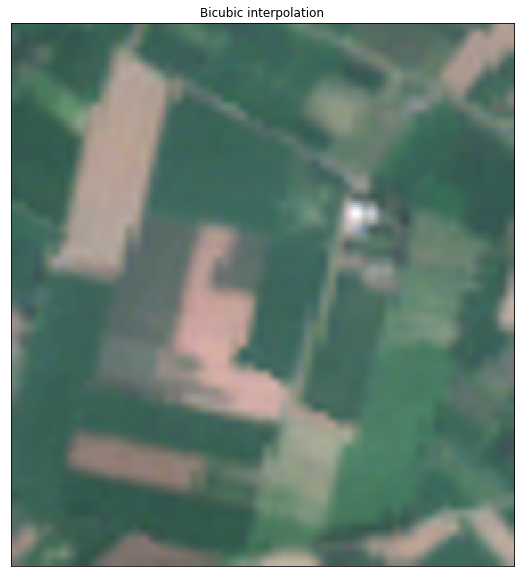

In [26]:
from utils import load_image
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def plot(img):
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.title("Bicubic interpolation")
    plt.xticks([])
    plt.yticks([])

sat_img_path = f'../satellite_rgb/Subset_projected_S2B_MSIL2A_20190306T052709_N0211_R105_T43RGP_20190306T101639.png'
img = Image.open(sat_img_path)
size = np.array(img.size)
img = img.resize(size*4, resample=Image.BICUBIC)
plot(img)

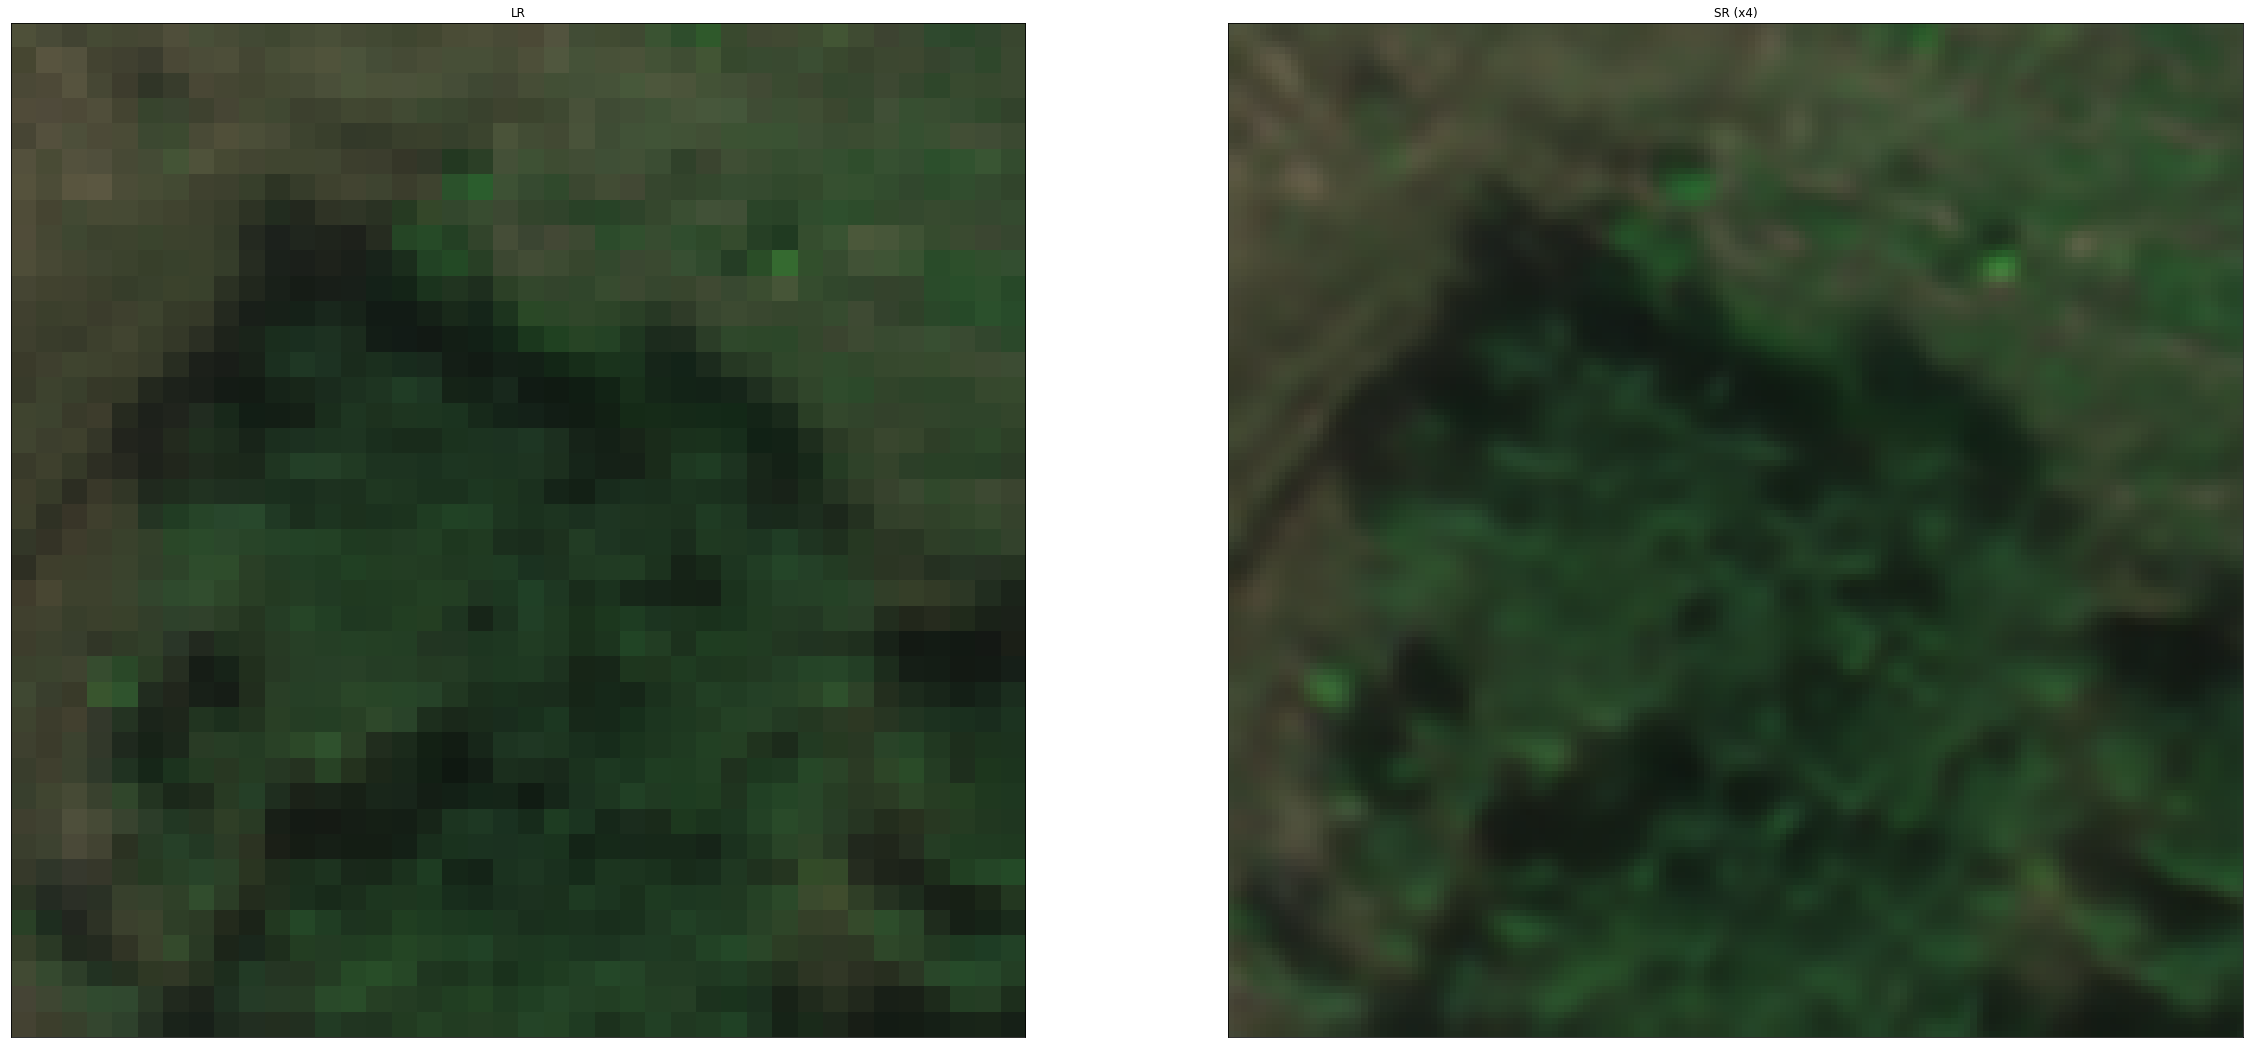

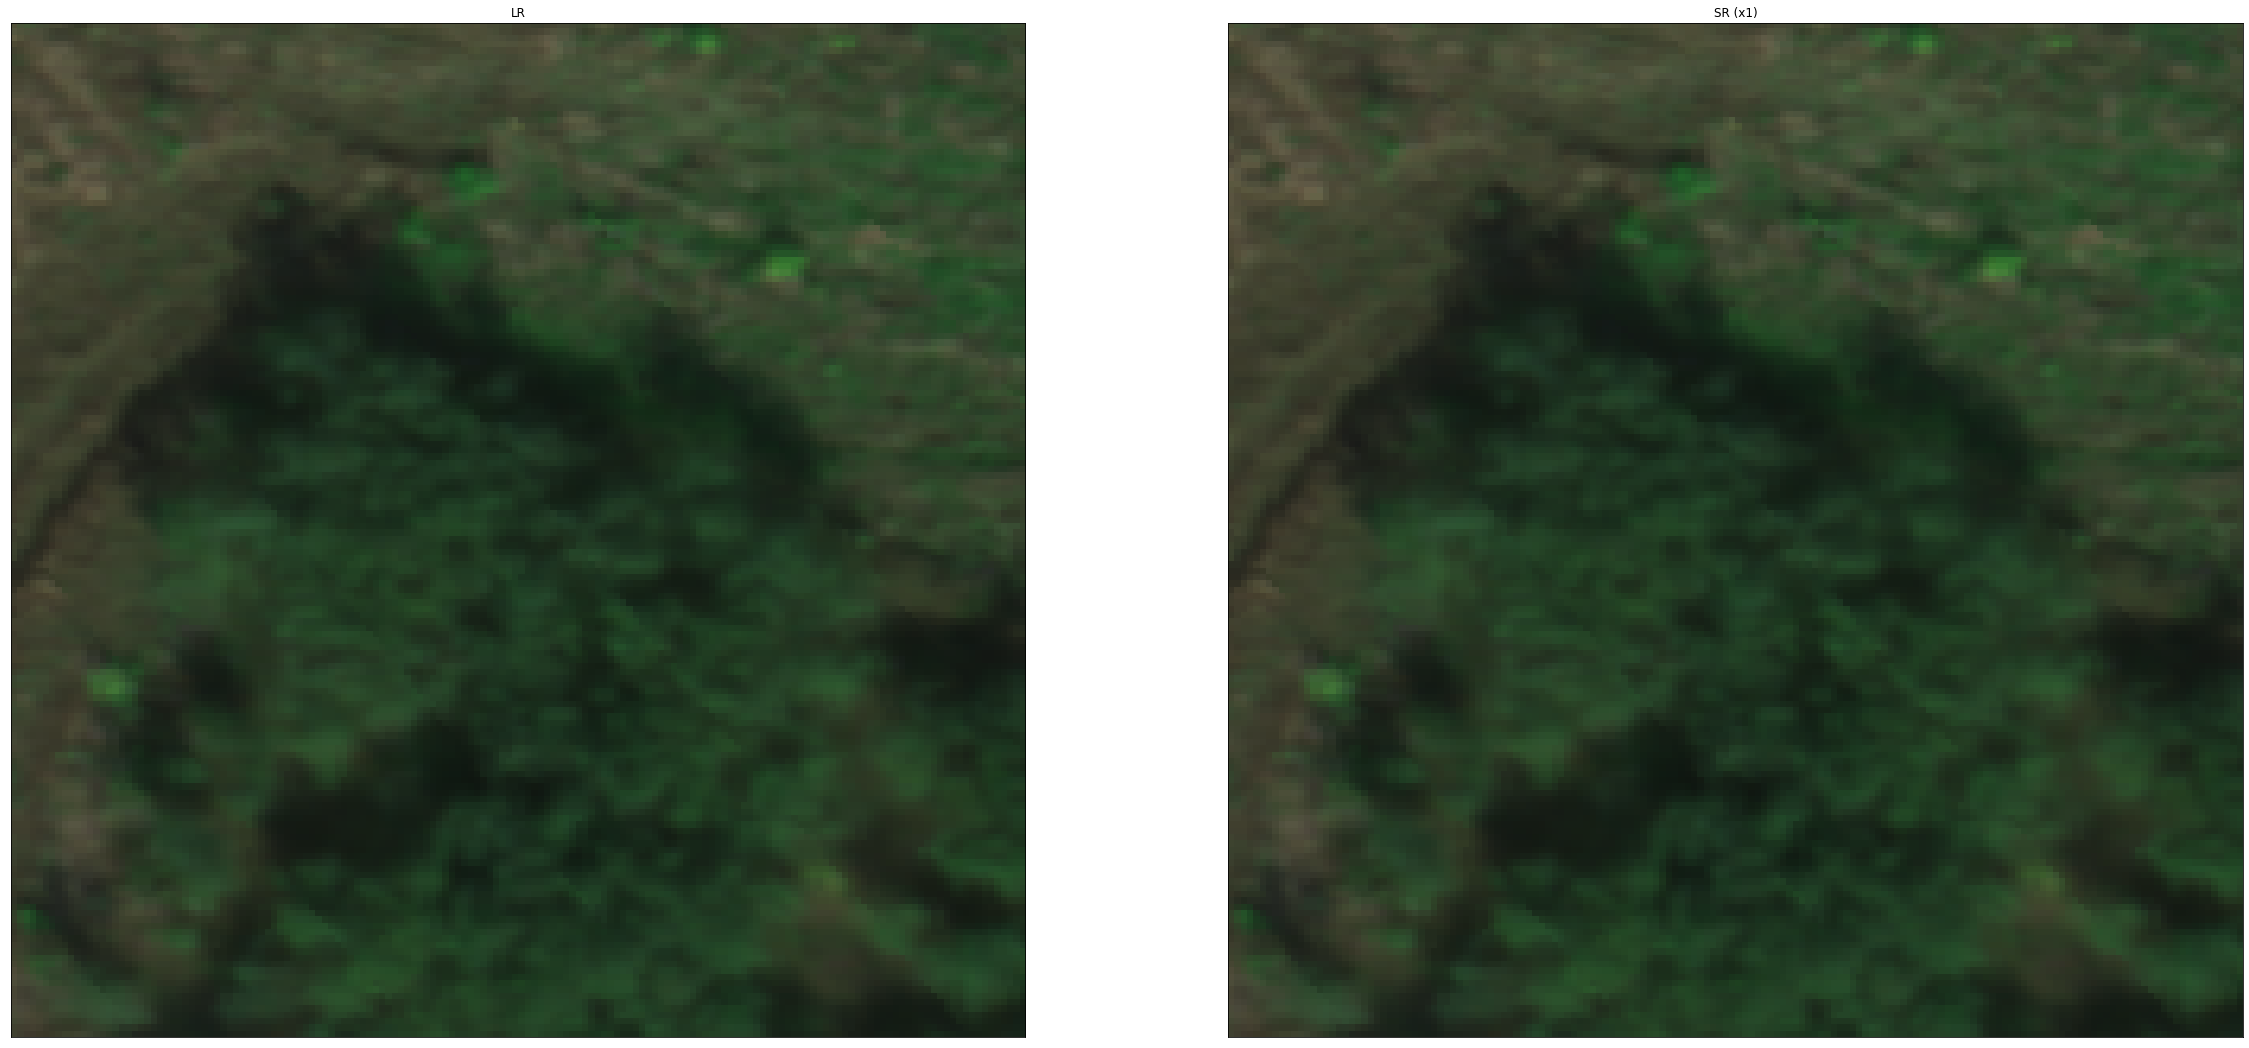

In [27]:
num = 56
drone_loc = '/home/kareka/Academics/btpself/data/'
drone_img_path = drone_loc+'drone_rgb_lr/'+str(num)+'_04.png'
drone_img_path_hr = drone_loc+'drone_rgb_hr/'+str(num)+'.png'

lr = load_image(drone_img_path)
img = Image.open(drone_img_path)
size = np.array(img.size)
img = img.resize(size*4, resample=Image.BICUBIC)
sr = resolve_single(wdsrb_model, lr)
hr = load_image(drone_img_path_hr)

plot_sample(lr, sr)
plot_sample(hr, hr)

In [31]:
import tensorflow as tf
from models.common import psnr

def evaluate_(dataset):
    psnr_values = []
    for lr, hr in dataset:
        sr = tf.image.resize(lr, [160, 160], method='bilinear')
        sr = tf.clip_by_value(sr, 0, 255)
        sr = tf.round(sr)
        sr = tf.cast(sr, tf.uint8)
        psnr_value = psnr(hr, sr)[0]
        psnr_values.append(psnr_value.numpy())
    print(psnr_values)
    return tf.reduce_mean(psnr_values)

psnr = evaluate_(valid_ds)
print(f'PSNR = {psnr.numpy():3f}')

[28.068096, 32.361835, 32.703903, 30.813057, 31.12345, 30.395252, 31.983393, 31.229483, 29.299826, 29.306381, 30.581463, 31.238663, 31.301298, 31.626394, 32.47034, 32.343132, 32.53091, 32.44784, 32.792473, 30.013561, 29.574266, 30.260033, 26.284285, 23.332212, 23.605024, 27.74657, 30.96625, 31.59698, 32.445133, 34.16312, 34.803696, 35.752743, 34.061817, 33.91697, 31.322954, 30.914286, 28.033638, 26.480162, 26.67419, 27.74488, 28.385, 29.313303, 29.568829, 32.56678, 31.880293, 31.19217, 31.323896, 30.372574, 29.63881, 30.876677, 31.332424, 32.05152, 31.11204, 30.819408, 32.04373, 32.316704, 32.831814, 33.096123, 32.652905, 29.118067, 29.816412, 29.874474, 30.548918, 29.3833, 26.079681, 32.543354, 35.13476, 35.51502, 35.56104, 35.35109, 34.689625, 33.23396, 32.710747, 30.913883, 31.523449, 31.057768, 31.198679, 27.194656, 26.8222, 26.76265, 28.836828, 28.623508, 29.74029, 32.28949, 32.9684, 33.155735, 32.264557, 32.51656, 32.325417, 32.55111, 33.947124, 32.775078, 31.5246, 31.010527, 33.